In [ ]:
!pip install -U gdown torch torchvision ftfy regex tqdm git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-7gkvn5_o
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-7gkvn5_o
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached torch-2.7.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas

 67%|██████▋   | 782M/1.17G [00:36<00:10, 38.1MB/s]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5 MB)
Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl (56.3 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (21.1 MB)
Using cached ftfy-6.3.1-py3-none-any.whl (44 kB)
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=fe9cc708f1e7c071a16722bce7477c56bd3b75f328e75e87b0b9b90b4adef5ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-_90r_eyq/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvji

In [ ]:
import gdown, zipfile, os

os.makedirs("/content/data", exist_ok=True)


In [ ]:
# === New ROI & STIMULI file IDs ===
roi_id = "1p6yPKM2Xiv5CCua9v8XGO17A238WLfbd"
stimuli_id = "1KEO-E2M3cBgNw2fM7UY_bqO1V9L4nkwa"

# Download the new ROI
gdown.download(id=roi_id, output="/content/data/BOLD5000_ROIs.zip", quiet=False)

# Download the new STIMULI
gdown.download(id=stimuli_id, output="/content/data/BOLD5000_STIMULI.zip", quiet=False)

# Unzip both
with zipfile.ZipFile("/content/data/BOLD5000_ROIs.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data/BOLD5000_ROIs")

with zipfile.ZipFile("/content/data/BOLD5000_STIMULI.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data/BOLD5000_STIMULI")


Downloading...
From (original): https://drive.google.com/uc?id=1p6yPKM2Xiv5CCua9v8XGO17A238WLfbd
From (redirected): https://drive.google.com/uc?id=1p6yPKM2Xiv5CCua9v8XGO17A238WLfbd&confirm=t&uuid=7657a33a-458e-40d8-ada1-ec33af3dccc1
To: /content/data/BOLD5000_ROIs.zip

  0%|          | 0.00/4.21G [00:00<?, ?B/s]
  0%|          | 2.62M/4.21G [00:00<11:54, 5.89MB/s]
  0%|          | 6.82M/4.21G [00:00<08:25, 8.32MB/s]
  0%|          | 15.2M/4.21G [00:01<04:58, 14.1MB/s]
  1%|          | 21.5M/4.21G [00:01<03:22, 20.7MB/s]
  1%|          | 25.7M/4.21G [00:01<03:50, 18.2MB/s]
  1%|          | 29.9M/4.21G [00:01<03:16, 21.3MB/s]
  1%|          | 36.2M/4.21G [00:02<03:32, 19.6MB/s]
  1%|          | 38.8M/4.21G [00:02<03:25, 20.3MB/s]
  1%|          | 46.7M/4.21G [00:02<02:55, 23.7MB/s]
  1%|          | 50.9M/4.21G [00:02<02:52, 24.2MB/s]
  1%|▏         | 59.2M/4.21G [00:02<02:38, 26.3MB/s]
  2%|▏         | 63.4M/4.21G [00:03<02:26, 28.4MB/s]
  2%|▏         | 71.8M/4.21G [00:03<02:10, 31.7MB/

In [ ]:
# ✅ Load fMRI Data
import scipy.io
roi_data = scipy.io.loadmat("/content/data/BOLD5000_ROIs/ROIs/CSI1/mat/CSI1_ROIs_TR34.mat")
fmri_matrix = roi_data['LHPPA']

 67%|██████▋   | 782M/1.17G [16:48<08:19, 775kB/s] 


In [ ]:
# ✅ Load Image Labels
label_txt_path = "/content/data/BOLD5000_STIMULI/BOLD5000_Stimuli/Image_Labels/scene_final_labels.txt"
with open(label_txt_path, 'r') as f:
    text_labels = [line.strip().split(' ', 1)[-1] for line in f if line.strip()]

In [ ]:
# ✅ Collect image paths
image_paths = []
for root, dirs, files in os.walk("/content/data/BOLD5000_STIMULI"):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            image_paths.append(os.path.join(root, file))


In [ ]:
# Load text labels
with open("/content/data/BOLD5000_STIMULI/BOLD5000_Stimuli/Image_Labels/scene_final_labels.txt") as f:
    text_labels = [line.strip().split(" ", 1)[-1] for line in f if line.strip()]


Epoch 1/500: 100%|██████████| 4/4 [00:00<00:00, 17.38it/s]


✅ Epoch 1/500 Loss: 0.2332


Epoch 2/500: 100%|██████████| 4/4 [00:00<00:00, 22.25it/s]


✅ Epoch 2/500 Loss: 0.2326


Epoch 3/500: 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]


✅ Epoch 3/500 Loss: 0.2304


Epoch 4/500: 100%|██████████| 4/4 [00:00<00:00, 24.46it/s]


✅ Epoch 4/500 Loss: 0.2275


Epoch 5/500: 100%|██████████| 4/4 [00:00<00:00, 24.82it/s]


✅ Epoch 5/500 Loss: 0.2239


Epoch 6/500: 100%|██████████| 4/4 [00:00<00:00, 24.23it/s]


✅ Epoch 6/500 Loss: 0.2192


Epoch 7/500: 100%|██████████| 4/4 [00:00<00:00, 23.95it/s]


✅ Epoch 7/500 Loss: 0.2142


Epoch 8/500: 100%|██████████| 4/4 [00:00<00:00, 24.07it/s]


✅ Epoch 8/500 Loss: 0.2074


Epoch 9/500: 100%|██████████| 4/4 [00:00<00:00, 23.16it/s]


✅ Epoch 9/500 Loss: 0.2014


Epoch 10/500: 100%|██████████| 4/4 [00:00<00:00, 23.23it/s]


✅ Epoch 10/500 Loss: 0.1953


Epoch 11/500: 100%|██████████| 4/4 [00:00<00:00, 23.53it/s]


✅ Epoch 11/500 Loss: 0.1897


Epoch 12/500: 100%|██████████| 4/4 [00:00<00:00, 23.45it/s]


✅ Epoch 12/500 Loss: 0.1841


Epoch 13/500: 100%|██████████| 4/4 [00:00<00:00, 23.62it/s]


✅ Epoch 13/500 Loss: 0.1802


Epoch 14/500: 100%|██████████| 4/4 [00:00<00:00, 24.28it/s]


✅ Epoch 14/500 Loss: 0.1768


Epoch 15/500: 100%|██████████| 4/4 [00:00<00:00, 23.54it/s]


✅ Epoch 15/500 Loss: 0.1728


Epoch 16/500: 100%|██████████| 4/4 [00:00<00:00, 23.51it/s]


✅ Epoch 16/500 Loss: 0.1696


Epoch 17/500: 100%|██████████| 4/4 [00:00<00:00, 23.56it/s]


✅ Epoch 17/500 Loss: 0.1670


Epoch 18/500: 100%|██████████| 4/4 [00:00<00:00, 23.46it/s]


✅ Epoch 18/500 Loss: 0.1637


Epoch 19/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 19/500 Loss: 0.1612


Epoch 20/500: 100%|██████████| 4/4 [00:00<00:00, 24.07it/s]


✅ Epoch 20/500 Loss: 0.1589


Epoch 21/500: 100%|██████████| 4/4 [00:00<00:00, 23.80it/s]


✅ Epoch 21/500 Loss: 0.1569


Epoch 22/500: 100%|██████████| 4/4 [00:00<00:00, 24.16it/s]


✅ Epoch 22/500 Loss: 0.1531


Epoch 23/500: 100%|██████████| 4/4 [00:00<00:00, 23.40it/s]


✅ Epoch 23/500 Loss: 0.1493


Epoch 24/500: 100%|██████████| 4/4 [00:00<00:00, 22.47it/s]


✅ Epoch 24/500 Loss: 0.1452


Epoch 25/500: 100%|██████████| 4/4 [00:00<00:00, 23.57it/s]


✅ Epoch 25/500 Loss: 0.1414


Epoch 26/500: 100%|██████████| 4/4 [00:00<00:00, 22.51it/s]


✅ Epoch 26/500 Loss: 0.1372


Epoch 27/500: 100%|██████████| 4/4 [00:00<00:00, 23.57it/s]


✅ Epoch 27/500 Loss: 0.1336


Epoch 28/500: 100%|██████████| 4/4 [00:00<00:00, 23.52it/s]


✅ Epoch 28/500 Loss: 0.1293


Epoch 29/500: 100%|██████████| 4/4 [00:00<00:00, 23.64it/s]


✅ Epoch 29/500 Loss: 0.1248


Epoch 30/500: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


✅ Epoch 30/500 Loss: 0.1208


Epoch 31/500: 100%|██████████| 4/4 [00:00<00:00, 23.78it/s]


✅ Epoch 31/500 Loss: 0.1170


Epoch 32/500: 100%|██████████| 4/4 [00:00<00:00, 24.37it/s]


✅ Epoch 32/500 Loss: 0.1131


Epoch 33/500: 100%|██████████| 4/4 [00:00<00:00, 23.98it/s]


✅ Epoch 33/500 Loss: 0.1094


Epoch 34/500: 100%|██████████| 4/4 [00:00<00:00, 24.06it/s]


✅ Epoch 34/500 Loss: 0.1065


Epoch 35/500: 100%|██████████| 4/4 [00:00<00:00, 23.49it/s]


✅ Epoch 35/500 Loss: 0.1042


Epoch 36/500: 100%|██████████| 4/4 [00:00<00:00, 22.71it/s]


✅ Epoch 36/500 Loss: 0.1012


Epoch 37/500: 100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


✅ Epoch 37/500 Loss: 0.0989


Epoch 38/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 38/500 Loss: 0.0971


Epoch 39/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 39/500 Loss: 0.0955


Epoch 40/500: 100%|██████████| 4/4 [00:00<00:00, 24.27it/s]


✅ Epoch 40/500 Loss: 0.0934


Epoch 41/500: 100%|██████████| 4/4 [00:00<00:00, 23.71it/s]


✅ Epoch 41/500 Loss: 0.0915


Epoch 42/500: 100%|██████████| 4/4 [00:00<00:00, 23.93it/s]


✅ Epoch 42/500 Loss: 0.0894


Epoch 43/500: 100%|██████████| 4/4 [00:00<00:00, 24.33it/s]


✅ Epoch 43/500 Loss: 0.0882


Epoch 44/500: 100%|██████████| 4/4 [00:00<00:00, 23.59it/s]


✅ Epoch 44/500 Loss: 0.0862


Epoch 45/500: 100%|██████████| 4/4 [00:00<00:00, 23.42it/s]


✅ Epoch 45/500 Loss: 0.0847


Epoch 46/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 46/500 Loss: 0.0843


Epoch 47/500: 100%|██████████| 4/4 [00:00<00:00, 23.40it/s]


✅ Epoch 47/500 Loss: 0.0829


Epoch 48/500: 100%|██████████| 4/4 [00:00<00:00, 23.97it/s]


✅ Epoch 48/500 Loss: 0.0812


Epoch 49/500: 100%|██████████| 4/4 [00:00<00:00, 23.46it/s]


✅ Epoch 49/500 Loss: 0.0804


Epoch 50/500: 100%|██████████| 4/4 [00:00<00:00, 24.10it/s]


✅ Epoch 50/500 Loss: 0.0796


Epoch 51/500: 100%|██████████| 4/4 [00:00<00:00, 23.48it/s]


✅ Epoch 51/500 Loss: 0.0793


Epoch 52/500: 100%|██████████| 4/4 [00:00<00:00, 23.91it/s]


✅ Epoch 52/500 Loss: 0.0780


Epoch 53/500: 100%|██████████| 4/4 [00:00<00:00, 23.60it/s]


✅ Epoch 53/500 Loss: 0.0766


Epoch 54/500: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


✅ Epoch 54/500 Loss: 0.0760


Epoch 55/500: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]


✅ Epoch 55/500 Loss: 0.0760


Epoch 56/500: 100%|██████████| 4/4 [00:00<00:00, 23.58it/s]


✅ Epoch 56/500 Loss: 0.0748


Epoch 57/500: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


✅ Epoch 57/500 Loss: 0.0731


Epoch 58/500: 100%|██████████| 4/4 [00:00<00:00, 23.39it/s]


✅ Epoch 58/500 Loss: 0.0722


Epoch 59/500: 100%|██████████| 4/4 [00:00<00:00, 23.97it/s]


✅ Epoch 59/500 Loss: 0.0714


Epoch 60/500: 100%|██████████| 4/4 [00:00<00:00, 23.15it/s]


✅ Epoch 60/500 Loss: 0.0706


Epoch 61/500: 100%|██████████| 4/4 [00:00<00:00, 23.84it/s]


✅ Epoch 61/500 Loss: 0.0701


Epoch 62/500: 100%|██████████| 4/4 [00:00<00:00, 23.41it/s]


✅ Epoch 62/500 Loss: 0.0690


Epoch 63/500: 100%|██████████| 4/4 [00:00<00:00, 24.05it/s]


✅ Epoch 63/500 Loss: 0.0684


Epoch 64/500: 100%|██████████| 4/4 [00:00<00:00, 23.54it/s]


✅ Epoch 64/500 Loss: 0.0675


Epoch 65/500: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


✅ Epoch 65/500 Loss: 0.0665


Epoch 66/500: 100%|██████████| 4/4 [00:00<00:00, 23.37it/s]


✅ Epoch 66/500 Loss: 0.0660


Epoch 67/500: 100%|██████████| 4/4 [00:00<00:00, 24.05it/s]


✅ Epoch 67/500 Loss: 0.0653


Epoch 68/500: 100%|██████████| 4/4 [00:00<00:00, 23.42it/s]


✅ Epoch 68/500 Loss: 0.0648


Epoch 69/500: 100%|██████████| 4/4 [00:00<00:00, 23.74it/s]


✅ Epoch 69/500 Loss: 0.0639


Epoch 70/500: 100%|██████████| 4/4 [00:00<00:00, 23.43it/s]


✅ Epoch 70/500 Loss: 0.0632


Epoch 71/500: 100%|██████████| 4/4 [00:00<00:00, 23.39it/s]


✅ Epoch 71/500 Loss: 0.0630


Epoch 72/500: 100%|██████████| 4/4 [00:00<00:00, 23.55it/s]


✅ Epoch 72/500 Loss: 0.0625


Epoch 73/500: 100%|██████████| 4/4 [00:00<00:00, 23.64it/s]


✅ Epoch 73/500 Loss: 0.0621


Epoch 74/500: 100%|██████████| 4/4 [00:00<00:00, 23.74it/s]


✅ Epoch 74/500 Loss: 0.0612


Epoch 75/500: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


✅ Epoch 75/500 Loss: 0.0609


Epoch 76/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 76/500 Loss: 0.0606


Epoch 77/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 77/500 Loss: 0.0595


Epoch 78/500: 100%|██████████| 4/4 [00:00<00:00, 22.77it/s]


✅ Epoch 78/500 Loss: 0.0596


Epoch 79/500: 100%|██████████| 4/4 [00:00<00:00, 22.64it/s]


✅ Epoch 79/500 Loss: 0.0589


Epoch 80/500: 100%|██████████| 4/4 [00:00<00:00, 23.70it/s]


✅ Epoch 80/500 Loss: 0.0586


Epoch 81/500: 100%|██████████| 4/4 [00:00<00:00, 23.18it/s]


✅ Epoch 81/500 Loss: 0.0580


Epoch 82/500: 100%|██████████| 4/4 [00:00<00:00, 23.40it/s]


✅ Epoch 82/500 Loss: 0.0571


Epoch 83/500: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


✅ Epoch 83/500 Loss: 0.0567


Epoch 84/500: 100%|██████████| 4/4 [00:00<00:00, 22.81it/s]


✅ Epoch 84/500 Loss: 0.0562


Epoch 85/500: 100%|██████████| 4/4 [00:00<00:00, 22.95it/s]


✅ Epoch 85/500 Loss: 0.0552


Epoch 86/500: 100%|██████████| 4/4 [00:00<00:00, 22.91it/s]


✅ Epoch 86/500 Loss: 0.0553


Epoch 87/500: 100%|██████████| 4/4 [00:00<00:00, 23.13it/s]


✅ Epoch 87/500 Loss: 0.0547


Epoch 88/500: 100%|██████████| 4/4 [00:00<00:00, 22.90it/s]


✅ Epoch 88/500 Loss: 0.0539


Epoch 89/500: 100%|██████████| 4/4 [00:00<00:00, 22.62it/s]


✅ Epoch 89/500 Loss: 0.0538


Epoch 90/500: 100%|██████████| 4/4 [00:00<00:00, 22.60it/s]


✅ Epoch 90/500 Loss: 0.0535


Epoch 91/500: 100%|██████████| 4/4 [00:00<00:00, 23.60it/s]


✅ Epoch 91/500 Loss: 0.0536


Epoch 92/500: 100%|██████████| 4/4 [00:00<00:00, 23.42it/s]


✅ Epoch 92/500 Loss: 0.0537


Epoch 93/500: 100%|██████████| 4/4 [00:00<00:00, 23.61it/s]


✅ Epoch 93/500 Loss: 0.0535


Epoch 94/500: 100%|██████████| 4/4 [00:00<00:00, 23.39it/s]


✅ Epoch 94/500 Loss: 0.0523


Epoch 95/500: 100%|██████████| 4/4 [00:00<00:00, 23.49it/s]


✅ Epoch 95/500 Loss: 0.0521


Epoch 96/500: 100%|██████████| 4/4 [00:00<00:00, 23.19it/s]


✅ Epoch 96/500 Loss: 0.0514


Epoch 97/500: 100%|██████████| 4/4 [00:00<00:00, 23.23it/s]


✅ Epoch 97/500 Loss: 0.0507


Epoch 98/500: 100%|██████████| 4/4 [00:00<00:00, 23.75it/s]


✅ Epoch 98/500 Loss: 0.0505


Epoch 99/500: 100%|██████████| 4/4 [00:00<00:00, 23.57it/s]


✅ Epoch 99/500 Loss: 0.0504


Epoch 100/500: 100%|██████████| 4/4 [00:00<00:00, 23.09it/s]


✅ Epoch 100/500 Loss: 0.0501


Epoch 101/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 101/500 Loss: 0.0496


Epoch 102/500: 100%|██████████| 4/4 [00:00<00:00, 23.35it/s]


✅ Epoch 102/500 Loss: 0.0497


Epoch 103/500: 100%|██████████| 4/4 [00:00<00:00, 23.53it/s]


✅ Epoch 103/500 Loss: 0.0493


Epoch 104/500: 100%|██████████| 4/4 [00:00<00:00, 23.29it/s]


✅ Epoch 104/500 Loss: 0.0491


Epoch 105/500: 100%|██████████| 4/4 [00:00<00:00, 23.14it/s]


✅ Epoch 105/500 Loss: 0.0489


Epoch 106/500: 100%|██████████| 4/4 [00:00<00:00, 23.45it/s]


✅ Epoch 106/500 Loss: 0.0484


Epoch 107/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 107/500 Loss: 0.0488


Epoch 108/500: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


✅ Epoch 108/500 Loss: 0.0479


Epoch 109/500: 100%|██████████| 4/4 [00:00<00:00, 23.71it/s]


✅ Epoch 109/500 Loss: 0.0473


Epoch 110/500: 100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


✅ Epoch 110/500 Loss: 0.0474


Epoch 111/500: 100%|██████████| 4/4 [00:00<00:00, 23.56it/s]


✅ Epoch 111/500 Loss: 0.0470


Epoch 112/500: 100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


✅ Epoch 112/500 Loss: 0.0467


Epoch 113/500: 100%|██████████| 4/4 [00:00<00:00, 23.29it/s]


✅ Epoch 113/500 Loss: 0.0465


Epoch 114/500: 100%|██████████| 4/4 [00:00<00:00, 23.67it/s]


✅ Epoch 114/500 Loss: 0.0464


Epoch 115/500: 100%|██████████| 4/4 [00:00<00:00, 23.25it/s]


✅ Epoch 115/500 Loss: 0.0462


Epoch 116/500: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


✅ Epoch 116/500 Loss: 0.0458


Epoch 117/500: 100%|██████████| 4/4 [00:00<00:00, 23.77it/s]


✅ Epoch 117/500 Loss: 0.0452


Epoch 118/500: 100%|██████████| 4/4 [00:00<00:00, 23.41it/s]


✅ Epoch 118/500 Loss: 0.0449


Epoch 119/500: 100%|██████████| 4/4 [00:00<00:00, 23.37it/s]


✅ Epoch 119/500 Loss: 0.0447


Epoch 120/500: 100%|██████████| 4/4 [00:00<00:00, 24.15it/s]


✅ Epoch 120/500 Loss: 0.0447


Epoch 121/500: 100%|██████████| 4/4 [00:00<00:00, 23.25it/s]


✅ Epoch 121/500 Loss: 0.0448


Epoch 122/500: 100%|██████████| 4/4 [00:00<00:00, 23.11it/s]


✅ Epoch 122/500 Loss: 0.0449


Epoch 123/500: 100%|██████████| 4/4 [00:00<00:00, 23.29it/s]


✅ Epoch 123/500 Loss: 0.0441


Epoch 124/500: 100%|██████████| 4/4 [00:00<00:00, 23.48it/s]


✅ Epoch 124/500 Loss: 0.0438


Epoch 125/500: 100%|██████████| 4/4 [00:00<00:00, 23.16it/s]


✅ Epoch 125/500 Loss: 0.0440


Epoch 126/500: 100%|██████████| 4/4 [00:00<00:00, 23.15it/s]


✅ Epoch 126/500 Loss: 0.0433


Epoch 127/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 127/500 Loss: 0.0431


Epoch 128/500: 100%|██████████| 4/4 [00:00<00:00, 23.00it/s]


✅ Epoch 128/500 Loss: 0.0432


Epoch 129/500: 100%|██████████| 4/4 [00:00<00:00, 23.32it/s]


✅ Epoch 129/500 Loss: 0.0427


Epoch 130/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 130/500 Loss: 0.0425


Epoch 131/500: 100%|██████████| 4/4 [00:00<00:00, 23.36it/s]


✅ Epoch 131/500 Loss: 0.0422


Epoch 132/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 132/500 Loss: 0.0422


Epoch 133/500: 100%|██████████| 4/4 [00:00<00:00, 23.21it/s]


✅ Epoch 133/500 Loss: 0.0424


Epoch 134/500: 100%|██████████| 4/4 [00:00<00:00, 23.36it/s]


✅ Epoch 134/500 Loss: 0.0425


Epoch 135/500: 100%|██████████| 4/4 [00:00<00:00, 23.80it/s]


✅ Epoch 135/500 Loss: 0.0422


Epoch 136/500: 100%|██████████| 4/4 [00:00<00:00, 23.24it/s]


✅ Epoch 136/500 Loss: 0.0424


Epoch 137/500: 100%|██████████| 4/4 [00:00<00:00, 23.98it/s]


✅ Epoch 137/500 Loss: 0.0422


Epoch 138/500: 100%|██████████| 4/4 [00:00<00:00, 22.95it/s]


✅ Epoch 138/500 Loss: 0.0415


Epoch 139/500: 100%|██████████| 4/4 [00:00<00:00, 23.20it/s]


✅ Epoch 139/500 Loss: 0.0412


Epoch 140/500: 100%|██████████| 4/4 [00:00<00:00, 23.50it/s]


✅ Epoch 140/500 Loss: 0.0407


Epoch 141/500: 100%|██████████| 4/4 [00:00<00:00, 23.18it/s]


✅ Epoch 141/500 Loss: 0.0408


Epoch 142/500: 100%|██████████| 4/4 [00:00<00:00, 23.22it/s]


✅ Epoch 142/500 Loss: 0.0405


Epoch 143/500: 100%|██████████| 4/4 [00:00<00:00, 23.47it/s]


✅ Epoch 143/500 Loss: 0.0402


Epoch 144/500: 100%|██████████| 4/4 [00:00<00:00, 23.43it/s]


✅ Epoch 144/500 Loss: 0.0404


Epoch 145/500: 100%|██████████| 4/4 [00:00<00:00, 23.68it/s]


✅ Epoch 145/500 Loss: 0.0403


Epoch 146/500: 100%|██████████| 4/4 [00:00<00:00, 23.78it/s]


✅ Epoch 146/500 Loss: 0.0401


Epoch 147/500: 100%|██████████| 4/4 [00:00<00:00, 23.39it/s]


✅ Epoch 147/500 Loss: 0.0397


Epoch 148/500: 100%|██████████| 4/4 [00:00<00:00, 22.81it/s]


✅ Epoch 148/500 Loss: 0.0400


Epoch 149/500: 100%|██████████| 4/4 [00:00<00:00, 22.81it/s]


✅ Epoch 149/500 Loss: 0.0394


Epoch 150/500: 100%|██████████| 4/4 [00:00<00:00, 23.31it/s]


✅ Epoch 150/500 Loss: 0.0397


Epoch 151/500: 100%|██████████| 4/4 [00:00<00:00, 23.12it/s]


✅ Epoch 151/500 Loss: 0.0393


Epoch 152/500: 100%|██████████| 4/4 [00:00<00:00, 23.58it/s]


✅ Epoch 152/500 Loss: 0.0394


Epoch 153/500: 100%|██████████| 4/4 [00:00<00:00, 23.59it/s]


✅ Epoch 153/500 Loss: 0.0392


Epoch 154/500: 100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


✅ Epoch 154/500 Loss: 0.0386


Epoch 155/500: 100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


✅ Epoch 155/500 Loss: 0.0384


Epoch 156/500: 100%|██████████| 4/4 [00:00<00:00, 22.57it/s]


✅ Epoch 156/500 Loss: 0.0384


Epoch 157/500: 100%|██████████| 4/4 [00:00<00:00, 22.97it/s]


✅ Epoch 157/500 Loss: 0.0384


Epoch 158/500: 100%|██████████| 4/4 [00:00<00:00, 22.79it/s]


✅ Epoch 158/500 Loss: 0.0383


Epoch 159/500: 100%|██████████| 4/4 [00:00<00:00, 23.59it/s]


✅ Epoch 159/500 Loss: 0.0383


Epoch 160/500: 100%|██████████| 4/4 [00:00<00:00, 22.86it/s]


✅ Epoch 160/500 Loss: 0.0380


Epoch 161/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 161/500 Loss: 0.0377


Epoch 162/500: 100%|██████████| 4/4 [00:00<00:00, 23.16it/s]


✅ Epoch 162/500 Loss: 0.0375


Epoch 163/500: 100%|██████████| 4/4 [00:00<00:00, 23.62it/s]


✅ Epoch 163/500 Loss: 0.0375


Epoch 164/500: 100%|██████████| 4/4 [00:00<00:00, 23.63it/s]


✅ Epoch 164/500 Loss: 0.0375


Epoch 165/500: 100%|██████████| 4/4 [00:00<00:00, 23.44it/s]


✅ Epoch 165/500 Loss: 0.0370


Epoch 166/500: 100%|██████████| 4/4 [00:00<00:00, 23.54it/s]


✅ Epoch 166/500 Loss: 0.0369


Epoch 167/500: 100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


✅ Epoch 167/500 Loss: 0.0369


Epoch 168/500: 100%|██████████| 4/4 [00:00<00:00, 22.85it/s]


✅ Epoch 168/500 Loss: 0.0368


Epoch 169/500: 100%|██████████| 4/4 [00:00<00:00, 24.00it/s]


✅ Epoch 169/500 Loss: 0.0366


Epoch 170/500: 100%|██████████| 4/4 [00:00<00:00, 23.31it/s]


✅ Epoch 170/500 Loss: 0.0368


Epoch 171/500: 100%|██████████| 4/4 [00:00<00:00, 23.94it/s]


✅ Epoch 171/500 Loss: 0.0366


Epoch 172/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 172/500 Loss: 0.0363


Epoch 173/500: 100%|██████████| 4/4 [00:00<00:00, 23.74it/s]


✅ Epoch 173/500 Loss: 0.0362


Epoch 174/500: 100%|██████████| 4/4 [00:00<00:00, 23.93it/s]


✅ Epoch 174/500 Loss: 0.0361


Epoch 175/500: 100%|██████████| 4/4 [00:00<00:00, 23.63it/s]


✅ Epoch 175/500 Loss: 0.0363


Epoch 176/500: 100%|██████████| 4/4 [00:00<00:00, 23.47it/s]


✅ Epoch 176/500 Loss: 0.0360


Epoch 177/500: 100%|██████████| 4/4 [00:00<00:00, 23.26it/s]


✅ Epoch 177/500 Loss: 0.0361


Epoch 178/500: 100%|██████████| 4/4 [00:00<00:00, 23.94it/s]


✅ Epoch 178/500 Loss: 0.0364


Epoch 179/500: 100%|██████████| 4/4 [00:00<00:00, 23.49it/s]


✅ Epoch 179/500 Loss: 0.0359


Epoch 180/500: 100%|██████████| 4/4 [00:00<00:00, 23.60it/s]


✅ Epoch 180/500 Loss: 0.0358


Epoch 181/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 181/500 Loss: 0.0353


Epoch 182/500: 100%|██████████| 4/4 [00:00<00:00, 24.15it/s]


✅ Epoch 182/500 Loss: 0.0352


Epoch 183/500: 100%|██████████| 4/4 [00:00<00:00, 23.47it/s]


✅ Epoch 183/500 Loss: 0.0353


Epoch 184/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 184/500 Loss: 0.0350


Epoch 185/500: 100%|██████████| 4/4 [00:00<00:00, 23.61it/s]


✅ Epoch 185/500 Loss: 0.0347


Epoch 186/500: 100%|██████████| 4/4 [00:00<00:00, 22.83it/s]


✅ Epoch 186/500 Loss: 0.0345


Epoch 187/500: 100%|██████████| 4/4 [00:00<00:00, 24.09it/s]


✅ Epoch 187/500 Loss: 0.0346


Epoch 188/500: 100%|██████████| 4/4 [00:00<00:00, 23.36it/s]


✅ Epoch 188/500 Loss: 0.0346


Epoch 189/500: 100%|██████████| 4/4 [00:00<00:00, 24.03it/s]


✅ Epoch 189/500 Loss: 0.0344


Epoch 190/500: 100%|██████████| 4/4 [00:00<00:00, 23.44it/s]


✅ Epoch 190/500 Loss: 0.0345


Epoch 191/500: 100%|██████████| 4/4 [00:00<00:00, 23.85it/s]


✅ Epoch 191/500 Loss: 0.0342


Epoch 192/500: 100%|██████████| 4/4 [00:00<00:00, 23.49it/s]


✅ Epoch 192/500 Loss: 0.0340


Epoch 193/500: 100%|██████████| 4/4 [00:00<00:00, 24.43it/s]


✅ Epoch 193/500 Loss: 0.0340


Epoch 194/500: 100%|██████████| 4/4 [00:00<00:00, 23.24it/s]


✅ Epoch 194/500 Loss: 0.0337


Epoch 195/500: 100%|██████████| 4/4 [00:00<00:00, 24.40it/s]


✅ Epoch 195/500 Loss: 0.0342


Epoch 196/500: 100%|██████████| 4/4 [00:00<00:00, 23.51it/s]


✅ Epoch 196/500 Loss: 0.0337


Epoch 197/500: 100%|██████████| 4/4 [00:00<00:00, 23.93it/s]


✅ Epoch 197/500 Loss: 0.0337


Epoch 198/500: 100%|██████████| 4/4 [00:00<00:00, 23.39it/s]


✅ Epoch 198/500 Loss: 0.0339


Epoch 199/500: 100%|██████████| 4/4 [00:00<00:00, 24.04it/s]


✅ Epoch 199/500 Loss: 0.0340


Epoch 200/500: 100%|██████████| 4/4 [00:00<00:00, 23.58it/s]


✅ Epoch 200/500 Loss: 0.0339


Epoch 201/500: 100%|██████████| 4/4 [00:00<00:00, 23.75it/s]


✅ Epoch 201/500 Loss: 0.0338


Epoch 202/500: 100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


✅ Epoch 202/500 Loss: 0.0334


Epoch 203/500: 100%|██████████| 4/4 [00:00<00:00, 24.07it/s]


✅ Epoch 203/500 Loss: 0.0334


Epoch 204/500: 100%|██████████| 4/4 [00:00<00:00, 22.87it/s]


✅ Epoch 204/500 Loss: 0.0329


Epoch 205/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 205/500 Loss: 0.0331


Epoch 206/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 206/500 Loss: 0.0329


Epoch 207/500: 100%|██████████| 4/4 [00:00<00:00, 24.57it/s]


✅ Epoch 207/500 Loss: 0.0328


Epoch 208/500: 100%|██████████| 4/4 [00:00<00:00, 23.53it/s]


✅ Epoch 208/500 Loss: 0.0326


Epoch 209/500: 100%|██████████| 4/4 [00:00<00:00, 23.73it/s]


✅ Epoch 209/500 Loss: 0.0324


Epoch 210/500: 100%|██████████| 4/4 [00:00<00:00, 22.93it/s]


✅ Epoch 210/500 Loss: 0.0324


Epoch 211/500: 100%|██████████| 4/4 [00:00<00:00, 24.25it/s]


✅ Epoch 211/500 Loss: 0.0324


Epoch 212/500: 100%|██████████| 4/4 [00:00<00:00, 23.51it/s]


✅ Epoch 212/500 Loss: 0.0323


Epoch 213/500: 100%|██████████| 4/4 [00:00<00:00, 23.97it/s]


✅ Epoch 213/500 Loss: 0.0326


Epoch 214/500: 100%|██████████| 4/4 [00:00<00:00, 23.75it/s]


✅ Epoch 214/500 Loss: 0.0323


Epoch 215/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 215/500 Loss: 0.0322


Epoch 216/500: 100%|██████████| 4/4 [00:00<00:00, 23.32it/s]


✅ Epoch 216/500 Loss: 0.0320


Epoch 217/500: 100%|██████████| 4/4 [00:00<00:00, 23.85it/s]


✅ Epoch 217/500 Loss: 0.0316


Epoch 218/500: 100%|██████████| 4/4 [00:00<00:00, 23.77it/s]


✅ Epoch 218/500 Loss: 0.0317


Epoch 219/500: 100%|██████████| 4/4 [00:00<00:00, 23.27it/s]


✅ Epoch 219/500 Loss: 0.0315


Epoch 220/500: 100%|██████████| 4/4 [00:00<00:00, 23.37it/s]


✅ Epoch 220/500 Loss: 0.0317


Epoch 221/500: 100%|██████████| 4/4 [00:00<00:00, 23.21it/s]


✅ Epoch 221/500 Loss: 0.0315


Epoch 222/500: 100%|██████████| 4/4 [00:00<00:00, 23.42it/s]


✅ Epoch 222/500 Loss: 0.0314


Epoch 223/500: 100%|██████████| 4/4 [00:00<00:00, 23.67it/s]


✅ Epoch 223/500 Loss: 0.0312


Epoch 224/500: 100%|██████████| 4/4 [00:00<00:00, 23.78it/s]


✅ Epoch 224/500 Loss: 0.0314


Epoch 225/500: 100%|██████████| 4/4 [00:00<00:00, 23.53it/s]


✅ Epoch 225/500 Loss: 0.0314


Epoch 226/500: 100%|██████████| 4/4 [00:00<00:00, 24.11it/s]


✅ Epoch 226/500 Loss: 0.0313


Epoch 227/500: 100%|██████████| 4/4 [00:00<00:00, 23.34it/s]


✅ Epoch 227/500 Loss: 0.0311


Epoch 228/500: 100%|██████████| 4/4 [00:00<00:00, 23.19it/s]


✅ Epoch 228/500 Loss: 0.0309


Epoch 229/500: 100%|██████████| 4/4 [00:00<00:00, 22.92it/s]


✅ Epoch 229/500 Loss: 0.0307


Epoch 230/500: 100%|██████████| 4/4 [00:00<00:00, 23.51it/s]


✅ Epoch 230/500 Loss: 0.0307


Epoch 231/500: 100%|██████████| 4/4 [00:00<00:00, 23.32it/s]


✅ Epoch 231/500 Loss: 0.0307


Epoch 232/500: 100%|██████████| 4/4 [00:00<00:00, 23.77it/s]


✅ Epoch 232/500 Loss: 0.0309


Epoch 233/500: 100%|██████████| 4/4 [00:00<00:00, 24.27it/s]


✅ Epoch 233/500 Loss: 0.0310


Epoch 234/500: 100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


✅ Epoch 234/500 Loss: 0.0308


Epoch 235/500: 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]


✅ Epoch 235/500 Loss: 0.0308


Epoch 236/500: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


✅ Epoch 236/500 Loss: 0.0305


Epoch 237/500: 100%|██████████| 4/4 [00:00<00:00, 23.73it/s]


✅ Epoch 237/500 Loss: 0.0305


Epoch 238/500: 100%|██████████| 4/4 [00:00<00:00, 23.78it/s]


✅ Epoch 238/500 Loss: 0.0305


Epoch 239/500: 100%|██████████| 4/4 [00:00<00:00, 23.95it/s]


✅ Epoch 239/500 Loss: 0.0303


Epoch 240/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 240/500 Loss: 0.0306


Epoch 241/500: 100%|██████████| 4/4 [00:00<00:00, 23.61it/s]


✅ Epoch 241/500 Loss: 0.0304


Epoch 242/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 242/500 Loss: 0.0301


Epoch 243/500: 100%|██████████| 4/4 [00:00<00:00, 23.68it/s]


✅ Epoch 243/500 Loss: 0.0302


Epoch 244/500: 100%|██████████| 4/4 [00:00<00:00, 23.95it/s]


✅ Epoch 244/500 Loss: 0.0300


Epoch 245/500: 100%|██████████| 4/4 [00:00<00:00, 24.12it/s]


✅ Epoch 245/500 Loss: 0.0297


Epoch 246/500: 100%|██████████| 4/4 [00:00<00:00, 23.57it/s]


✅ Epoch 246/500 Loss: 0.0296


Epoch 247/500: 100%|██████████| 4/4 [00:00<00:00, 24.19it/s]


✅ Epoch 247/500 Loss: 0.0296


Epoch 248/500: 100%|██████████| 4/4 [00:00<00:00, 23.97it/s]


✅ Epoch 248/500 Loss: 0.0297


Epoch 249/500: 100%|██████████| 4/4 [00:00<00:00, 23.44it/s]


✅ Epoch 249/500 Loss: 0.0298


Epoch 250/500: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


✅ Epoch 250/500 Loss: 0.0294


Epoch 251/500: 100%|██████████| 4/4 [00:00<00:00, 23.93it/s]


✅ Epoch 251/500 Loss: 0.0293


Epoch 252/500: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


✅ Epoch 252/500 Loss: 0.0293


Epoch 253/500: 100%|██████████| 4/4 [00:00<00:00, 24.01it/s]


✅ Epoch 253/500 Loss: 0.0291


Epoch 254/500: 100%|██████████| 4/4 [00:00<00:00, 23.91it/s]


✅ Epoch 254/500 Loss: 0.0291


Epoch 255/500: 100%|██████████| 4/4 [00:00<00:00, 23.23it/s]


✅ Epoch 255/500 Loss: 0.0290


Epoch 256/500: 100%|██████████| 4/4 [00:00<00:00, 24.05it/s]


✅ Epoch 256/500 Loss: 0.0289


Epoch 257/500: 100%|██████████| 4/4 [00:00<00:00, 24.15it/s]


✅ Epoch 257/500 Loss: 0.0288


Epoch 258/500: 100%|██████████| 4/4 [00:00<00:00, 24.14it/s]


✅ Epoch 258/500 Loss: 0.0288


Epoch 259/500: 100%|██████████| 4/4 [00:00<00:00, 23.46it/s]


✅ Epoch 259/500 Loss: 0.0287


Epoch 260/500: 100%|██████████| 4/4 [00:00<00:00, 24.52it/s]


✅ Epoch 260/500 Loss: 0.0285


Epoch 261/500: 100%|██████████| 4/4 [00:00<00:00, 23.50it/s]


✅ Epoch 261/500 Loss: 0.0286


Epoch 262/500: 100%|██████████| 4/4 [00:00<00:00, 24.28it/s]


✅ Epoch 262/500 Loss: 0.0286


Epoch 263/500: 100%|██████████| 4/4 [00:00<00:00, 24.59it/s]


✅ Epoch 263/500 Loss: 0.0286


Epoch 264/500: 100%|██████████| 4/4 [00:00<00:00, 23.29it/s]


✅ Epoch 264/500 Loss: 0.0288


Epoch 265/500: 100%|██████████| 4/4 [00:00<00:00, 24.07it/s]


✅ Epoch 265/500 Loss: 0.0287


Epoch 266/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 266/500 Loss: 0.0285


Epoch 267/500: 100%|██████████| 4/4 [00:00<00:00, 24.37it/s]


✅ Epoch 267/500 Loss: 0.0281


Epoch 268/500: 100%|██████████| 4/4 [00:00<00:00, 23.90it/s]


✅ Epoch 268/500 Loss: 0.0281


Epoch 269/500: 100%|██████████| 4/4 [00:00<00:00, 23.76it/s]


✅ Epoch 269/500 Loss: 0.0282


Epoch 270/500: 100%|██████████| 4/4 [00:00<00:00, 23.92it/s]


✅ Epoch 270/500 Loss: 0.0281


Epoch 271/500: 100%|██████████| 4/4 [00:00<00:00, 23.98it/s]


✅ Epoch 271/500 Loss: 0.0279


Epoch 272/500: 100%|██████████| 4/4 [00:00<00:00, 24.35it/s]


✅ Epoch 272/500 Loss: 0.0283


Epoch 273/500: 100%|██████████| 4/4 [00:00<00:00, 23.45it/s]


✅ Epoch 273/500 Loss: 0.0284


Epoch 274/500: 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]


✅ Epoch 274/500 Loss: 0.0281


Epoch 275/500: 100%|██████████| 4/4 [00:00<00:00, 23.58it/s]


✅ Epoch 275/500 Loss: 0.0279


Epoch 276/500: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


✅ Epoch 276/500 Loss: 0.0276


Epoch 277/500: 100%|██████████| 4/4 [00:00<00:00, 23.95it/s]


✅ Epoch 277/500 Loss: 0.0277


Epoch 278/500: 100%|██████████| 4/4 [00:00<00:00, 24.19it/s]


✅ Epoch 278/500 Loss: 0.0276


Epoch 279/500: 100%|██████████| 4/4 [00:00<00:00, 23.74it/s]


✅ Epoch 279/500 Loss: 0.0274


Epoch 280/500: 100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


✅ Epoch 280/500 Loss: 0.0276


Epoch 281/500: 100%|██████████| 4/4 [00:00<00:00, 23.71it/s]


✅ Epoch 281/500 Loss: 0.0278


Epoch 282/500: 100%|██████████| 4/4 [00:00<00:00, 23.66it/s]


✅ Epoch 282/500 Loss: 0.0274


Epoch 283/500: 100%|██████████| 4/4 [00:00<00:00, 23.95it/s]


✅ Epoch 283/500 Loss: 0.0273


Epoch 284/500: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


✅ Epoch 284/500 Loss: 0.0272


Epoch 285/500: 100%|██████████| 4/4 [00:00<00:00, 24.30it/s]


✅ Epoch 285/500 Loss: 0.0271


Epoch 286/500: 100%|██████████| 4/4 [00:00<00:00, 23.87it/s]


✅ Epoch 286/500 Loss: 0.0274


Epoch 287/500: 100%|██████████| 4/4 [00:00<00:00, 24.14it/s]


✅ Epoch 287/500 Loss: 0.0271


Epoch 288/500: 100%|██████████| 4/4 [00:00<00:00, 24.48it/s]


✅ Epoch 288/500 Loss: 0.0270


Epoch 289/500: 100%|██████████| 4/4 [00:00<00:00, 23.71it/s]


✅ Epoch 289/500 Loss: 0.0268


Epoch 290/500: 100%|██████████| 4/4 [00:00<00:00, 24.31it/s]


✅ Epoch 290/500 Loss: 0.0268


Epoch 291/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 291/500 Loss: 0.0269


Epoch 292/500: 100%|██████████| 4/4 [00:00<00:00, 23.17it/s]


✅ Epoch 292/500 Loss: 0.0267


Epoch 293/500: 100%|██████████| 4/4 [00:00<00:00, 23.67it/s]


✅ Epoch 293/500 Loss: 0.0267


Epoch 294/500: 100%|██████████| 4/4 [00:00<00:00, 23.41it/s]


✅ Epoch 294/500 Loss: 0.0266


Epoch 295/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 295/500 Loss: 0.0266


Epoch 296/500: 100%|██████████| 4/4 [00:00<00:00, 23.87it/s]


✅ Epoch 296/500 Loss: 0.0264


Epoch 297/500: 100%|██████████| 4/4 [00:00<00:00, 23.13it/s]


✅ Epoch 297/500 Loss: 0.0263


Epoch 298/500: 100%|██████████| 4/4 [00:00<00:00, 23.36it/s]


✅ Epoch 298/500 Loss: 0.0263


Epoch 299/500: 100%|██████████| 4/4 [00:00<00:00, 24.21it/s]


✅ Epoch 299/500 Loss: 0.0262


Epoch 300/500: 100%|██████████| 4/4 [00:00<00:00, 22.66it/s]


✅ Epoch 300/500 Loss: 0.0263


Epoch 301/500: 100%|██████████| 4/4 [00:00<00:00, 23.40it/s]


✅ Epoch 301/500 Loss: 0.0261


Epoch 302/500: 100%|██████████| 4/4 [00:00<00:00, 23.04it/s]


✅ Epoch 302/500 Loss: 0.0261


Epoch 303/500: 100%|██████████| 4/4 [00:00<00:00, 23.42it/s]


✅ Epoch 303/500 Loss: 0.0265


Epoch 304/500: 100%|██████████| 4/4 [00:00<00:00, 23.27it/s]


✅ Epoch 304/500 Loss: 0.0267


Epoch 305/500: 100%|██████████| 4/4 [00:00<00:00, 23.44it/s]


✅ Epoch 305/500 Loss: 0.0265


Epoch 306/500: 100%|██████████| 4/4 [00:00<00:00, 24.10it/s]


✅ Epoch 306/500 Loss: 0.0264


Epoch 307/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 307/500 Loss: 0.0262


Epoch 308/500: 100%|██████████| 4/4 [00:00<00:00, 24.27it/s]


✅ Epoch 308/500 Loss: 0.0258


Epoch 309/500: 100%|██████████| 4/4 [00:00<00:00, 24.00it/s]


✅ Epoch 309/500 Loss: 0.0258


Epoch 310/500: 100%|██████████| 4/4 [00:00<00:00, 24.18it/s]


✅ Epoch 310/500 Loss: 0.0260


Epoch 311/500: 100%|██████████| 4/4 [00:00<00:00, 23.77it/s]


✅ Epoch 311/500 Loss: 0.0258


Epoch 312/500: 100%|██████████| 4/4 [00:00<00:00, 24.16it/s]


✅ Epoch 312/500 Loss: 0.0257


Epoch 313/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 313/500 Loss: 0.0257


Epoch 314/500: 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]


✅ Epoch 314/500 Loss: 0.0259


Epoch 315/500: 100%|██████████| 4/4 [00:00<00:00, 24.11it/s]


✅ Epoch 315/500 Loss: 0.0262


Epoch 316/500: 100%|██████████| 4/4 [00:00<00:00, 23.71it/s]


✅ Epoch 316/500 Loss: 0.0257


Epoch 317/500: 100%|██████████| 4/4 [00:00<00:00, 24.57it/s]


✅ Epoch 317/500 Loss: 0.0256


Epoch 318/500: 100%|██████████| 4/4 [00:00<00:00, 23.50it/s]


✅ Epoch 318/500 Loss: 0.0255


Epoch 319/500: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


✅ Epoch 319/500 Loss: 0.0257


Epoch 320/500: 100%|██████████| 4/4 [00:00<00:00, 23.67it/s]


✅ Epoch 320/500 Loss: 0.0258


Epoch 321/500: 100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


✅ Epoch 321/500 Loss: 0.0265


Epoch 322/500: 100%|██████████| 4/4 [00:00<00:00, 23.93it/s]


✅ Epoch 322/500 Loss: 0.0263


Epoch 323/500: 100%|██████████| 4/4 [00:00<00:00, 24.05it/s]


✅ Epoch 323/500 Loss: 0.0266


Epoch 324/500: 100%|██████████| 4/4 [00:00<00:00, 24.39it/s]


✅ Epoch 324/500 Loss: 0.0269


Epoch 325/500: 100%|██████████| 4/4 [00:00<00:00, 23.84it/s]


✅ Epoch 325/500 Loss: 0.0268


Epoch 326/500: 100%|██████████| 4/4 [00:00<00:00, 24.06it/s]


✅ Epoch 326/500 Loss: 0.0260


Epoch 327/500: 100%|██████████| 4/4 [00:00<00:00, 24.80it/s]


✅ Epoch 327/500 Loss: 0.0255


Epoch 328/500: 100%|██████████| 4/4 [00:00<00:00, 24.24it/s]


✅ Epoch 328/500 Loss: 0.0253


Epoch 329/500: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]


✅ Epoch 329/500 Loss: 0.0250


Epoch 330/500: 100%|██████████| 4/4 [00:00<00:00, 24.44it/s]


✅ Epoch 330/500 Loss: 0.0249


Epoch 331/500: 100%|██████████| 4/4 [00:00<00:00, 24.03it/s]


✅ Epoch 331/500 Loss: 0.0251


Epoch 332/500: 100%|██████████| 4/4 [00:00<00:00, 23.84it/s]


✅ Epoch 332/500 Loss: 0.0250


Epoch 333/500: 100%|██████████| 4/4 [00:00<00:00, 24.72it/s]


✅ Epoch 333/500 Loss: 0.0252


Epoch 334/500: 100%|██████████| 4/4 [00:00<00:00, 24.29it/s]


✅ Epoch 334/500 Loss: 0.0252


Epoch 335/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 335/500 Loss: 0.0247


Epoch 336/500: 100%|██████████| 4/4 [00:00<00:00, 24.22it/s]


✅ Epoch 336/500 Loss: 0.0248


Epoch 337/500: 100%|██████████| 4/4 [00:00<00:00, 23.97it/s]


✅ Epoch 337/500 Loss: 0.0250


Epoch 338/500: 100%|██████████| 4/4 [00:00<00:00, 23.63it/s]


✅ Epoch 338/500 Loss: 0.0251


Epoch 339/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 339/500 Loss: 0.0254


Epoch 340/500: 100%|██████████| 4/4 [00:00<00:00, 23.74it/s]


✅ Epoch 340/500 Loss: 0.0255


Epoch 341/500: 100%|██████████| 4/4 [00:00<00:00, 24.51it/s]


✅ Epoch 341/500 Loss: 0.0248


Epoch 342/500: 100%|██████████| 4/4 [00:00<00:00, 24.16it/s]


✅ Epoch 342/500 Loss: 0.0246


Epoch 343/500: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


✅ Epoch 343/500 Loss: 0.0242


Epoch 344/500: 100%|██████████| 4/4 [00:00<00:00, 24.23it/s]


✅ Epoch 344/500 Loss: 0.0242


Epoch 345/500: 100%|██████████| 4/4 [00:00<00:00, 23.68it/s]


✅ Epoch 345/500 Loss: 0.0243


Epoch 346/500: 100%|██████████| 4/4 [00:00<00:00, 24.24it/s]


✅ Epoch 346/500 Loss: 0.0239


Epoch 347/500: 100%|██████████| 4/4 [00:00<00:00, 24.44it/s]


✅ Epoch 347/500 Loss: 0.0239


Epoch 348/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 348/500 Loss: 0.0239


Epoch 349/500: 100%|██████████| 4/4 [00:00<00:00, 24.41it/s]


✅ Epoch 349/500 Loss: 0.0237


Epoch 350/500: 100%|██████████| 4/4 [00:00<00:00, 24.37it/s]


✅ Epoch 350/500 Loss: 0.0238


Epoch 351/500: 100%|██████████| 4/4 [00:00<00:00, 23.64it/s]


✅ Epoch 351/500 Loss: 0.0241


Epoch 352/500: 100%|██████████| 4/4 [00:00<00:00, 24.44it/s]


✅ Epoch 352/500 Loss: 0.0238


Epoch 353/500: 100%|██████████| 4/4 [00:00<00:00, 24.28it/s]


✅ Epoch 353/500 Loss: 0.0237


Epoch 354/500: 100%|██████████| 4/4 [00:00<00:00, 23.87it/s]


✅ Epoch 354/500 Loss: 0.0242


Epoch 355/500: 100%|██████████| 4/4 [00:00<00:00, 23.74it/s]


✅ Epoch 355/500 Loss: 0.0243


Epoch 356/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 356/500 Loss: 0.0238


Epoch 357/500: 100%|██████████| 4/4 [00:00<00:00, 24.48it/s]


✅ Epoch 357/500 Loss: 0.0242


Epoch 358/500: 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]


✅ Epoch 358/500 Loss: 0.0242


Epoch 359/500: 100%|██████████| 4/4 [00:00<00:00, 23.92it/s]


✅ Epoch 359/500 Loss: 0.0236


Epoch 360/500: 100%|██████████| 4/4 [00:00<00:00, 24.38it/s]


✅ Epoch 360/500 Loss: 0.0242


Epoch 361/500: 100%|██████████| 4/4 [00:00<00:00, 23.92it/s]


✅ Epoch 361/500 Loss: 0.0236


Epoch 362/500: 100%|██████████| 4/4 [00:00<00:00, 24.15it/s]


✅ Epoch 362/500 Loss: 0.0241


Epoch 363/500: 100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


✅ Epoch 363/500 Loss: 0.0240


Epoch 364/500: 100%|██████████| 4/4 [00:00<00:00, 23.91it/s]


✅ Epoch 364/500 Loss: 0.0235


Epoch 365/500: 100%|██████████| 4/4 [00:00<00:00, 24.38it/s]


✅ Epoch 365/500 Loss: 0.0234


Epoch 366/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 366/500 Loss: 0.0231


Epoch 367/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 367/500 Loss: 0.0230


Epoch 368/500: 100%|██████████| 4/4 [00:00<00:00, 23.05it/s]


✅ Epoch 368/500 Loss: 0.0227


Epoch 369/500: 100%|██████████| 4/4 [00:00<00:00, 22.38it/s]


✅ Epoch 369/500 Loss: 0.0224


Epoch 370/500: 100%|██████████| 4/4 [00:00<00:00, 24.44it/s]


✅ Epoch 370/500 Loss: 0.0226


Epoch 371/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 371/500 Loss: 0.0225


Epoch 372/500: 100%|██████████| 4/4 [00:00<00:00, 24.07it/s]


✅ Epoch 372/500 Loss: 0.0224


Epoch 373/500: 100%|██████████| 4/4 [00:00<00:00, 23.94it/s]


✅ Epoch 373/500 Loss: 0.0223


Epoch 374/500: 100%|██████████| 4/4 [00:00<00:00, 23.46it/s]


✅ Epoch 374/500 Loss: 0.0223


Epoch 375/500: 100%|██████████| 4/4 [00:00<00:00, 22.77it/s]


✅ Epoch 375/500 Loss: 0.0220


Epoch 376/500: 100%|██████████| 4/4 [00:00<00:00, 23.30it/s]


✅ Epoch 376/500 Loss: 0.0219


Epoch 377/500: 100%|██████████| 4/4 [00:00<00:00, 23.28it/s]


✅ Epoch 377/500 Loss: 0.0220


Epoch 378/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 378/500 Loss: 0.0219


Epoch 379/500: 100%|██████████| 4/4 [00:00<00:00, 24.51it/s]


✅ Epoch 379/500 Loss: 0.0219


Epoch 380/500: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


✅ Epoch 380/500 Loss: 0.0218


Epoch 381/500: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


✅ Epoch 381/500 Loss: 0.0219


Epoch 382/500: 100%|██████████| 4/4 [00:00<00:00, 24.75it/s]


✅ Epoch 382/500 Loss: 0.0218


Epoch 383/500: 100%|██████████| 4/4 [00:00<00:00, 24.33it/s]


✅ Epoch 383/500 Loss: 0.0219


Epoch 384/500: 100%|██████████| 4/4 [00:00<00:00, 23.90it/s]


✅ Epoch 384/500 Loss: 0.0219


Epoch 385/500: 100%|██████████| 4/4 [00:00<00:00, 24.32it/s]


✅ Epoch 385/500 Loss: 0.0220


Epoch 386/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 386/500 Loss: 0.0217


Epoch 387/500: 100%|██████████| 4/4 [00:00<00:00, 24.03it/s]


✅ Epoch 387/500 Loss: 0.0215


Epoch 388/500: 100%|██████████| 4/4 [00:00<00:00, 24.24it/s]


✅ Epoch 388/500 Loss: 0.0217


Epoch 389/500: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


✅ Epoch 389/500 Loss: 0.0216


Epoch 390/500: 100%|██████████| 4/4 [00:00<00:00, 24.24it/s]


✅ Epoch 390/500 Loss: 0.0215


Epoch 391/500: 100%|██████████| 4/4 [00:00<00:00, 24.34it/s]


✅ Epoch 391/500 Loss: 0.0220


Epoch 392/500: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


✅ Epoch 392/500 Loss: 0.0214


Epoch 393/500: 100%|██████████| 4/4 [00:00<00:00, 24.67it/s]


✅ Epoch 393/500 Loss: 0.0214


Epoch 394/500: 100%|██████████| 4/4 [00:00<00:00, 24.34it/s]


✅ Epoch 394/500 Loss: 0.0214


Epoch 395/500: 100%|██████████| 4/4 [00:00<00:00, 23.94it/s]


✅ Epoch 395/500 Loss: 0.0216


Epoch 396/500: 100%|██████████| 4/4 [00:00<00:00, 24.84it/s]


✅ Epoch 396/500 Loss: 0.0212


Epoch 397/500: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


✅ Epoch 397/500 Loss: 0.0211


Epoch 398/500: 100%|██████████| 4/4 [00:00<00:00, 23.91it/s]


✅ Epoch 398/500 Loss: 0.0211


Epoch 399/500: 100%|██████████| 4/4 [00:00<00:00, 24.61it/s]


✅ Epoch 399/500 Loss: 0.0210


Epoch 400/500: 100%|██████████| 4/4 [00:00<00:00, 23.92it/s]


✅ Epoch 400/500 Loss: 0.0209


Epoch 401/500: 100%|██████████| 4/4 [00:00<00:00, 24.02it/s]


✅ Epoch 401/500 Loss: 0.0208


Epoch 402/500: 100%|██████████| 4/4 [00:00<00:00, 24.61it/s]


✅ Epoch 402/500 Loss: 0.0209


Epoch 403/500: 100%|██████████| 4/4 [00:00<00:00, 24.05it/s]


✅ Epoch 403/500 Loss: 0.0209


Epoch 404/500: 100%|██████████| 4/4 [00:00<00:00, 24.23it/s]


✅ Epoch 404/500 Loss: 0.0208


Epoch 405/500: 100%|██████████| 4/4 [00:00<00:00, 24.77it/s]


✅ Epoch 405/500 Loss: 0.0208


Epoch 406/500: 100%|██████████| 4/4 [00:00<00:00, 24.54it/s]


✅ Epoch 406/500 Loss: 0.0208


Epoch 407/500: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]


✅ Epoch 407/500 Loss: 0.0209


Epoch 408/500: 100%|██████████| 4/4 [00:00<00:00, 24.56it/s]


✅ Epoch 408/500 Loss: 0.0210


Epoch 409/500: 100%|██████████| 4/4 [00:00<00:00, 24.13it/s]


✅ Epoch 409/500 Loss: 0.0208


Epoch 410/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 410/500 Loss: 0.0209


Epoch 411/500: 100%|██████████| 4/4 [00:00<00:00, 24.61it/s]


✅ Epoch 411/500 Loss: 0.0207


Epoch 412/500: 100%|██████████| 4/4 [00:00<00:00, 24.29it/s]


✅ Epoch 412/500 Loss: 0.0206


Epoch 413/500: 100%|██████████| 4/4 [00:00<00:00, 23.84it/s]


✅ Epoch 413/500 Loss: 0.0205


Epoch 414/500: 100%|██████████| 4/4 [00:00<00:00, 24.37it/s]


✅ Epoch 414/500 Loss: 0.0206


Epoch 415/500: 100%|██████████| 4/4 [00:00<00:00, 24.10it/s]


✅ Epoch 415/500 Loss: 0.0204


Epoch 416/500: 100%|██████████| 4/4 [00:00<00:00, 24.22it/s]


✅ Epoch 416/500 Loss: 0.0203


Epoch 417/500: 100%|██████████| 4/4 [00:00<00:00, 24.73it/s]


✅ Epoch 417/500 Loss: 0.0204


Epoch 418/500: 100%|██████████| 4/4 [00:00<00:00, 24.21it/s]


✅ Epoch 418/500 Loss: 0.0202


Epoch 419/500: 100%|██████████| 4/4 [00:00<00:00, 23.86it/s]


✅ Epoch 419/500 Loss: 0.0203


Epoch 420/500: 100%|██████████| 4/4 [00:00<00:00, 24.41it/s]


✅ Epoch 420/500 Loss: 0.0201


Epoch 421/500: 100%|██████████| 4/4 [00:00<00:00, 24.53it/s]


✅ Epoch 421/500 Loss: 0.0201


Epoch 422/500: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


✅ Epoch 422/500 Loss: 0.0201


Epoch 423/500: 100%|██████████| 4/4 [00:00<00:00, 24.00it/s]


✅ Epoch 423/500 Loss: 0.0200


Epoch 424/500: 100%|██████████| 4/4 [00:00<00:00, 24.36it/s]


✅ Epoch 424/500 Loss: 0.0199


Epoch 425/500: 100%|██████████| 4/4 [00:00<00:00, 24.06it/s]


✅ Epoch 425/500 Loss: 0.0201


Epoch 426/500: 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]


✅ Epoch 426/500 Loss: 0.0200


Epoch 427/500: 100%|██████████| 4/4 [00:00<00:00, 23.55it/s]


✅ Epoch 427/500 Loss: 0.0200


Epoch 428/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 428/500 Loss: 0.0200


Epoch 429/500: 100%|██████████| 4/4 [00:00<00:00, 24.25it/s]


✅ Epoch 429/500 Loss: 0.0199


Epoch 430/500: 100%|██████████| 4/4 [00:00<00:00, 23.57it/s]


✅ Epoch 430/500 Loss: 0.0201


Epoch 431/500: 100%|██████████| 4/4 [00:00<00:00, 24.44it/s]


✅ Epoch 431/500 Loss: 0.0202


Epoch 432/500: 100%|██████████| 4/4 [00:00<00:00, 24.21it/s]


✅ Epoch 432/500 Loss: 0.0200


Epoch 433/500: 100%|██████████| 4/4 [00:00<00:00, 24.07it/s]


✅ Epoch 433/500 Loss: 0.0200


Epoch 434/500: 100%|██████████| 4/4 [00:00<00:00, 24.76it/s]


✅ Epoch 434/500 Loss: 0.0198


Epoch 435/500: 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]


✅ Epoch 435/500 Loss: 0.0199


Epoch 436/500: 100%|██████████| 4/4 [00:00<00:00, 24.12it/s]


✅ Epoch 436/500 Loss: 0.0204


Epoch 437/500: 100%|██████████| 4/4 [00:00<00:00, 23.66it/s]


✅ Epoch 437/500 Loss: 0.0199


Epoch 438/500: 100%|██████████| 4/4 [00:00<00:00, 23.60it/s]


✅ Epoch 438/500 Loss: 0.0199


Epoch 439/500: 100%|██████████| 4/4 [00:00<00:00, 22.63it/s]


✅ Epoch 439/500 Loss: 0.0198


Epoch 440/500: 100%|██████████| 4/4 [00:00<00:00, 24.41it/s]


✅ Epoch 440/500 Loss: 0.0197


Epoch 441/500: 100%|██████████| 4/4 [00:00<00:00, 23.23it/s]


✅ Epoch 441/500 Loss: 0.0195


Epoch 442/500: 100%|██████████| 4/4 [00:00<00:00, 24.05it/s]


✅ Epoch 442/500 Loss: 0.0195


Epoch 443/500: 100%|██████████| 4/4 [00:00<00:00, 23.09it/s]


✅ Epoch 443/500 Loss: 0.0195


Epoch 444/500: 100%|██████████| 4/4 [00:00<00:00, 23.99it/s]


✅ Epoch 444/500 Loss: 0.0195


Epoch 445/500: 100%|██████████| 4/4 [00:00<00:00, 23.41it/s]


✅ Epoch 445/500 Loss: 0.0193


Epoch 446/500: 100%|██████████| 4/4 [00:00<00:00, 24.59it/s]


✅ Epoch 446/500 Loss: 0.0194


Epoch 447/500: 100%|██████████| 4/4 [00:00<00:00, 23.27it/s]


✅ Epoch 447/500 Loss: 0.0193


Epoch 448/500: 100%|██████████| 4/4 [00:00<00:00, 22.46it/s]


✅ Epoch 448/500 Loss: 0.0194


Epoch 449/500: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]


✅ Epoch 449/500 Loss: 0.0192


Epoch 450/500: 100%|██████████| 4/4 [00:00<00:00, 23.93it/s]


✅ Epoch 450/500 Loss: 0.0192


Epoch 451/500: 100%|██████████| 4/4 [00:00<00:00, 23.08it/s]


✅ Epoch 451/500 Loss: 0.0191


Epoch 452/500: 100%|██████████| 4/4 [00:00<00:00, 24.36it/s]


✅ Epoch 452/500 Loss: 0.0192


Epoch 453/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 453/500 Loss: 0.0193


Epoch 454/500: 100%|██████████| 4/4 [00:00<00:00, 24.40it/s]


✅ Epoch 454/500 Loss: 0.0194


Epoch 455/500: 100%|██████████| 4/4 [00:00<00:00, 24.42it/s]


✅ Epoch 455/500 Loss: 0.0191


Epoch 456/500: 100%|██████████| 4/4 [00:00<00:00, 23.65it/s]


✅ Epoch 456/500 Loss: 0.0191


Epoch 457/500: 100%|██████████| 4/4 [00:00<00:00, 24.04it/s]


✅ Epoch 457/500 Loss: 0.0189


Epoch 458/500: 100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


✅ Epoch 458/500 Loss: 0.0189


Epoch 459/500: 100%|██████████| 4/4 [00:00<00:00, 24.33it/s]


✅ Epoch 459/500 Loss: 0.0190


Epoch 460/500: 100%|██████████| 4/4 [00:00<00:00, 23.69it/s]


✅ Epoch 460/500 Loss: 0.0188


Epoch 461/500: 100%|██████████| 4/4 [00:00<00:00, 24.28it/s]


✅ Epoch 461/500 Loss: 0.0189


Epoch 462/500: 100%|██████████| 4/4 [00:00<00:00, 21.75it/s]


✅ Epoch 462/500 Loss: 0.0189


Epoch 463/500: 100%|██████████| 4/4 [00:00<00:00, 15.00it/s]


✅ Epoch 463/500 Loss: 0.0193


Epoch 464/500: 100%|██████████| 4/4 [00:00<00:00, 19.66it/s]


✅ Epoch 464/500 Loss: 0.0192


Epoch 465/500: 100%|██████████| 4/4 [00:00<00:00, 24.27it/s]


✅ Epoch 465/500 Loss: 0.0193


Epoch 466/500: 100%|██████████| 4/4 [00:00<00:00, 24.41it/s]


✅ Epoch 466/500 Loss: 0.0193


Epoch 467/500: 100%|██████████| 4/4 [00:00<00:00, 23.87it/s]


✅ Epoch 467/500 Loss: 0.0192


Epoch 468/500: 100%|██████████| 4/4 [00:00<00:00, 24.52it/s]


✅ Epoch 468/500 Loss: 0.0193


Epoch 469/500: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


✅ Epoch 469/500 Loss: 0.0195


Epoch 470/500: 100%|██████████| 4/4 [00:00<00:00, 23.87it/s]


✅ Epoch 470/500 Loss: 0.0192


Epoch 471/500: 100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


✅ Epoch 471/500 Loss: 0.0190


Epoch 472/500: 100%|██████████| 4/4 [00:00<00:00, 23.94it/s]


✅ Epoch 472/500 Loss: 0.0189


Epoch 473/500: 100%|██████████| 4/4 [00:00<00:00, 24.08it/s]


✅ Epoch 473/500 Loss: 0.0189


Epoch 474/500: 100%|██████████| 4/4 [00:00<00:00, 24.30it/s]


✅ Epoch 474/500 Loss: 0.0187


Epoch 475/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 475/500 Loss: 0.0186


Epoch 476/500: 100%|██████████| 4/4 [00:00<00:00, 24.30it/s]


✅ Epoch 476/500 Loss: 0.0187


Epoch 477/500: 100%|██████████| 4/4 [00:00<00:00, 24.18it/s]


✅ Epoch 477/500 Loss: 0.0184


Epoch 478/500: 100%|██████████| 4/4 [00:00<00:00, 23.83it/s]


✅ Epoch 478/500 Loss: 0.0183


Epoch 479/500: 100%|██████████| 4/4 [00:00<00:00, 24.15it/s]


✅ Epoch 479/500 Loss: 0.0184


Epoch 480/500: 100%|██████████| 4/4 [00:00<00:00, 23.62it/s]


✅ Epoch 480/500 Loss: 0.0184


Epoch 481/500: 100%|██████████| 4/4 [00:00<00:00, 24.24it/s]


✅ Epoch 481/500 Loss: 0.0184


Epoch 482/500: 100%|██████████| 4/4 [00:00<00:00, 24.30it/s]


✅ Epoch 482/500 Loss: 0.0185


Epoch 483/500: 100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


✅ Epoch 483/500 Loss: 0.0185


Epoch 484/500: 100%|██████████| 4/4 [00:00<00:00, 24.59it/s]


✅ Epoch 484/500 Loss: 0.0186


Epoch 485/500: 100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


✅ Epoch 485/500 Loss: 0.0186


Epoch 486/500: 100%|██████████| 4/4 [00:00<00:00, 23.76it/s]


✅ Epoch 486/500 Loss: 0.0186


Epoch 487/500: 100%|██████████| 4/4 [00:00<00:00, 24.20it/s]


✅ Epoch 487/500 Loss: 0.0187


Epoch 488/500: 100%|██████████| 4/4 [00:00<00:00, 23.59it/s]


✅ Epoch 488/500 Loss: 0.0186


Epoch 489/500: 100%|██████████| 4/4 [00:00<00:00, 23.95it/s]


✅ Epoch 489/500 Loss: 0.0188


Epoch 490/500: 100%|██████████| 4/4 [00:00<00:00, 24.11it/s]


✅ Epoch 490/500 Loss: 0.0183


Epoch 491/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 491/500 Loss: 0.0186


Epoch 492/500: 100%|██████████| 4/4 [00:00<00:00, 24.63it/s]


✅ Epoch 492/500 Loss: 0.0183


Epoch 493/500: 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]


✅ Epoch 493/500 Loss: 0.0182


Epoch 494/500: 100%|██████████| 4/4 [00:00<00:00, 23.81it/s]


✅ Epoch 494/500 Loss: 0.0181


Epoch 495/500: 100%|██████████| 4/4 [00:00<00:00, 24.25it/s]


✅ Epoch 495/500 Loss: 0.0181


Epoch 496/500: 100%|██████████| 4/4 [00:00<00:00, 24.15it/s]


✅ Epoch 496/500 Loss: 0.0180


Epoch 497/500: 100%|██████████| 4/4 [00:00<00:00, 23.76it/s]


✅ Epoch 497/500 Loss: 0.0179


Epoch 498/500: 100%|██████████| 4/4 [00:00<00:00, 24.56it/s]


✅ Epoch 498/500 Loss: 0.0178


Epoch 499/500: 100%|██████████| 4/4 [00:00<00:00, 23.89it/s]


✅ Epoch 499/500 Loss: 0.0178


Epoch 500/500: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]


✅ Epoch 500/500 Loss: 0.0179


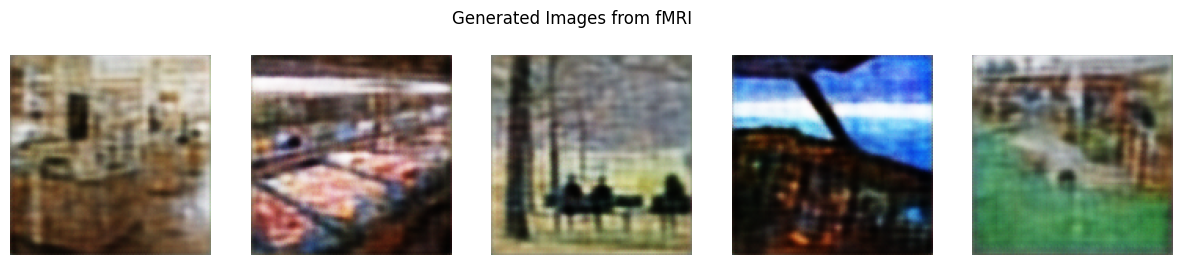

In [ ]:
# ✅ STEP 0: Preprocess and Align
from PIL import Image
import torchvision.transforms as T
import torch.nn.functional as F

transform = T.Compose([
    T.Resize((128, 128)),
    T.ToTensor(),
    T.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

image_paths = image_paths[:len(fmri_matrix)]
images_tensor = torch.stack([transform(Image.open(p).convert("RGB")) for p in image_paths])

fmri_tensor = torch.tensor(fmri_matrix, dtype=torch.float32)

# ✅ Match all sizes and trim to 1024 for fast sanity training
subset_size = 1024
min_len = min(subset_size, len(fmri_tensor), len(images_tensor), len(text_labels))
fmri_tensor = fmri_tensor[:min_len]
images_tensor = images_tensor[:min_len]
text_labels = text_labels[:min_len]

# ✅ Normalize fMRI
fmri_tensor = (fmri_tensor - fmri_tensor.mean(dim=0)) / (fmri_tensor.std(dim=0) + 1e-5)

# ✅ STEP 1: Encoder, Decoder, and Fully Connected Diffusion
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class fMRIEncoder(nn.Module):
    def __init__(self, input_dim=131, latent_dim=1024):
        super(fMRIEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, latent_dim)
        )

    def forward(self, x):
        return self.encoder(x)

class LatentDiffusion(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.Linear(dim, dim)
        )

    def forward(self, x):
        return self.net(x)

class SimpleDecoder(nn.Module):
    def __init__(self, latent_dim=1024):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 512 * 4 * 4)
        self.decode = nn.Sequential(
            nn.BatchNorm2d(512),
            nn.ConvTranspose2d(512, 256, 4, 2, 1),  # 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, 2, 1),  # 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),   # 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),    # 64x64
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),     # 128x128
            nn.Tanh()
        )

    def forward(self, x):
        x = self.fc(x).view(-1, 512, 4, 4)
        return self.decode(x)

fmri_encoder = fMRIEncoder(input_dim=fmri_tensor.shape[1], latent_dim=1024).to(device)
diffusion = LatentDiffusion(dim=1024).to(device)
decoder = SimpleDecoder(latent_dim=1024).to(device)

# ✅ STEP 2: Dataset and Loader
from torch.utils.data import Dataset, DataLoader

class fMRIDataset(Dataset):
    def __init__(self, fmri, images, labels):
        self.fmri = fmri
        self.images = images
        self.labels = labels

    def __len__(self): return len(self.fmri)

    def __getitem__(self, idx):
        return self.fmri[idx], self.images[idx], self.labels[idx]

dataset = fMRIDataset(fmri_tensor, images_tensor, text_labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# ✅ STEP 3: Training Loop
import torch.optim as optim
from tqdm import tqdm

optimizer = optim.Adam(
    list(fmri_encoder.parameters()) +
    list(diffusion.parameters()) +
    list(decoder.parameters()),
    lr=1e-4
)
criterion = nn.MSELoss()

for epoch in range(500):
    total_loss = 0
    fmri_encoder.train()
    diffusion.train()
    decoder.train()

    for fmri_batch, img_batch, label_batch in tqdm(dataloader, desc=f"Epoch {epoch+1}/500"):
        fmri_batch = fmri_batch.to(device)
        img_batch = img_batch.to(device)

        optimizer.zero_grad()

        latent = fmri_encoder(fmri_batch)
        transformed = diffusion(latent)
        output = decoder(transformed)

        loss = criterion(output, img_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"✅ Epoch {epoch+1}/500 Loss: {total_loss / len(dataloader):.4f}")

# ✅ STEP 4: Visualization
import matplotlib.pyplot as plt

def show_images(images, num=5):
    images = (images[:num].clamp(-1, 1) + 1) / 2  # De-normalize
    images = images.permute(0, 2, 3, 1)
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i].cpu().numpy())
        plt.axis("off")
    plt.suptitle("Generated Images from fMRI")
    plt.show()

with torch.no_grad():
    latent = fmri_encoder(fmri_tensor[:5].to(device))
    transformed = diffusion(latent)
    recon_images = decoder(transformed)

show_images(recon_images, num=5)

Phase 1: Double-Contrastive Masked Auto-Encoder (DC-MAE)

In [ ]:
!pip install -U gdown

import gdown, zipfile, os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import scipy.io

os.makedirs("/content/data", exist_ok=True)

# Updated file IDs
gdown.download(id="1KEO-E2M3cBgNw2fM7UY_bqO1V9L4nkwa", output="/content/data/BOLD5000_ROIs.zip", quiet=False)
gdown.download(id="1p6yPKM2Xiv5CCua9v8XGO17A238WLfbd", output="/content/data/BOLD5000_STIMULI.zip", quiet=False)

with zipfile.ZipFile("/content/data/BOLD5000_ROIs.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data/BOLD5000_ROIs")

with zipfile.ZipFile("/content/data/BOLD5000_STIMULI.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data/BOLD5000_STIMULI")



Downloading...
From (original): https://drive.google.com/uc?id=1KEO-E2M3cBgNw2fM7UY_bqO1V9L4nkwa
From (redirected): https://drive.google.com/uc?id=1KEO-E2M3cBgNw2fM7UY_bqO1V9L4nkwa&confirm=t&uuid=1ab20fb6-24e3-4b7f-887a-da7faa57d94c
To: /content/data/BOLD5000_ROIs.zip
100%|██████████| 1.17G/1.17G [00:18<00:00, 62.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1p6yPKM2Xiv5CCua9v8XGO17A238WLfbd
From (redirected): https://drive.google.com/uc?id=1p6yPKM2Xiv5CCua9v8XGO17A238WLfbd&confirm=t&uuid=74343a1b-a554-4fbe-a355-cb9e72f1bd7a
To: /content/data/BOLD5000_STIMULI.zip
100%|██████████| 4.21G/4.21G [00:56<00:00, 74.3MB/s]


In [ ]:
import glob

mat_files = glob.glob("/content/data/BOLD5000_ROIs/ROIs/**/**/*.mat", recursive=True)
for path in sorted(mat_files):
    print(path)


Epoch 1 | Loss: 92.0748 | LC: 28.3492 | LS: 63.7255
Epoch 2 | Loss: 64.7196 | LC: 21.4018 | LS: 43.3178
Epoch 3 | Loss: 47.1921 | LC: 18.1042 | LS: 29.0880
Epoch 4 | Loss: 36.3503 | LC: 16.3733 | LS: 19.9770
Epoch 5 | Loss: 31.2278 | LC: 16.1827 | LS: 15.0451
Epoch 6 | Loss: 26.1013 | LC: 14.1394 | LS: 11.9618
Epoch 7 | Loss: 23.5687 | LC: 13.7717 | LS: 9.7970
Epoch 8 | Loss: 21.1240 | LC: 12.8219 | LS: 8.3021
Epoch 9 | Loss: 20.4288 | LC: 12.9899 | LS: 7.4389
Epoch 10 | Loss: 19.2067 | LC: 12.5145 | LS: 6.6922


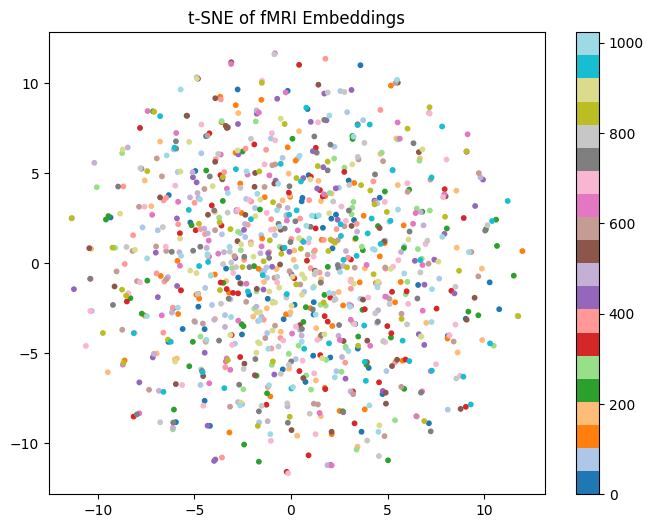

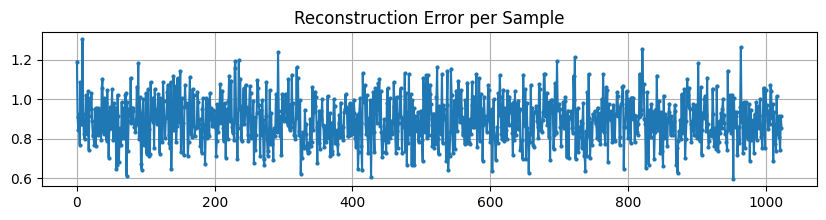

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE

# ----------------------------
# CONFIGURATION
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_samples = 1024
fmri_dim = 131
embedding_dim = 512
image_size = 128

# ----------------------------
# SYNTHETIC DATA
# ----------------------------
# Generate fMRI and synthetic image tensors
fmri_tensor = torch.randn(num_samples, fmri_dim)
text_labels = [f"Label {i}" for i in range(num_samples)]

# Generate random images
image_dir = "./synthetic_images/"
os.makedirs(image_dir, exist_ok=True)
for i in range(num_samples):
    img = Image.fromarray(np.uint8(np.random.rand(image_size, image_size, 3) * 255))
    img.save(os.path.join(image_dir, f"{i+1}.jpg"))

# Apply transforms
transform = T.Compose([
    T.Resize((image_size, image_size)),
    T.ToTensor(),
    T.Normalize([0.5]*3, [0.5]*3)
])
images_tensor = torch.stack([
    transform(Image.open(os.path.join(image_dir, f"{i+1}.jpg")).convert("RGB"))
    for i in range(num_samples)
])

# Normalize fMRI data
fmri_tensor = (fmri_tensor - fmri_tensor.mean(dim=0)) / (fmri_tensor.std(dim=0) + 1e-5)

# ----------------------------
# DC-MAE ENCODER / DECODER
# ----------------------------
class DC_MAE_Encoder(nn.Module):
    def __init__(self, input_dim, embed_dim=embedding_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, embed_dim)
        )
    def forward(self, x):
        return self.encoder(x)

class DC_MAE_Decoder(nn.Module):
    def __init__(self, embed_dim=embedding_dim, output_dim=fmri_dim):
        super().__init__()
        self.decoder = nn.Sequential(
            nn.Linear(embed_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim)
        )
    def forward(self, z):
        return self.decoder(z)

def info_nce_loss(z1, z2, temperature=0.1):
    z1 = F.normalize(z1, dim=-1)
    z2 = F.normalize(z2, dim=-1)
    logits = torch.matmul(z1, z2.T) / temperature
    labels = torch.arange(z1.size(0)).to(z1.device)
    return F.cross_entropy(logits, labels)

def dc_mae_training_step(x, encoder, decoder, mask_ratio=0.5, gamma_c=1.0, gamma_s=1.0):
    B, D = x.shape
    mask1 = (torch.rand_like(x) > mask_ratio).float()
    mask2 = (torch.rand_like(x) > mask_ratio).float()
    x1, x2 = x * mask1, x * mask2

    z1 = encoder(x1)
    z2 = encoder(x2)
    x1_recon = decoder(z1)
    x2_recon = decoder(z2)

    LC = info_nce_loss(x1_recon, x2_recon)
    LS = (info_nce_loss(x1_recon, x) + info_nce_loss(x2_recon, x)) / 2
    return gamma_c * LC + gamma_s * LS, LC.item(), LS.item()

# Dataset & Dataloader
class fMRIDataset(Dataset):
    def __init__(self, fmri):
        self.fmri = fmri
    def __len__(self): return len(self.fmri)
    def __getitem__(self, idx): return self.fmri[idx]

dataloader = DataLoader(fMRIDataset(fmri_tensor), batch_size=64, shuffle=True)

# Train Phase 1
encoder = DC_MAE_Encoder(input_dim=fmri_dim).to(device)
decoder = DC_MAE_Decoder().to(device)
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=1e-4)

for epoch in range(10):
    total_loss = total_lc = total_ls = 0
    for batch in dataloader:
        batch = batch.to(device)
        loss, lc, ls = dc_mae_training_step(batch, encoder, decoder)
        optimizer.zero_grad(); loss.backward(); optimizer.step()
        total_loss += loss.item(); total_lc += lc; total_ls += ls
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | LC: {total_lc:.4f} | LS: {total_ls:.4f}")

# t-SNE Visualization
with torch.no_grad():
    embeddings = encoder(fmri_tensor.to(device)).cpu().numpy()
embeddings_2d = TSNE(n_components=2, random_state=42).fit_transform(embeddings)
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=np.arange(num_samples), cmap='tab20', s=10)
plt.title("t-SNE of fMRI Embeddings"); plt.colorbar(); plt.show()

# Reconstruction Error
recon_fmri = decoder(torch.tensor(embeddings).to(device)).cpu()
recon_error = ((fmri_tensor - recon_fmri) ** 2).mean(dim=1)
plt.figure(figsize=(10, 2))
plt.plot(recon_error.detach().numpy(), marker='o', linestyle='-', markersize=2)
plt.title("Reconstruction Error per Sample"); plt.grid(True); plt.show()


Using device: cuda
Creating synthetic data...
Training set: 900 samples
Testing set: 100 samples
Starting training...
[Epoch 0/150] [Batch 0/29] [D loss: 0.7587] [G adv: 0.6102, pixel: 0.7969]
[Epoch 0/150] [Batch 10/29] [D loss: 1.6671] [G adv: 0.0798, pixel: 0.5314]
[Epoch 0/150] [Batch 20/29] [D loss: 1.3869] [G adv: 0.3581, pixel: 0.5373]
[Epoch 1/150] [Batch 0/29] [D loss: 1.5535] [G adv: 0.2740, pixel: 0.5689]
[Epoch 1/150] [Batch 10/29] [D loss: 1.2023] [G adv: 1.1487, pixel: 0.4558]
[Epoch 1/150] [Batch 20/29] [D loss: 0.7495] [G adv: 0.9991, pixel: 0.5215]
[Epoch 2/150] [Batch 0/29] [D loss: 0.5195] [G adv: 1.0626, pixel: 0.4426]
[Epoch 2/150] [Batch 10/29] [D loss: 1.0677] [G adv: 0.7765, pixel: 0.4649]
[Epoch 2/150] [Batch 20/29] [D loss: 0.6059] [G adv: 1.0263, pixel: 0.4723]
[Epoch 3/150] [Batch 0/29] [D loss: 0.1344] [G adv: 2.4898, pixel: 0.3261]
[Epoch 3/150] [Batch 10/29] [D loss: 0.6107] [G adv: 1.1960, pixel: 0.3786]
[Epoch 3/150] [Batch 20/29] [D loss: 0.4486] [G ad

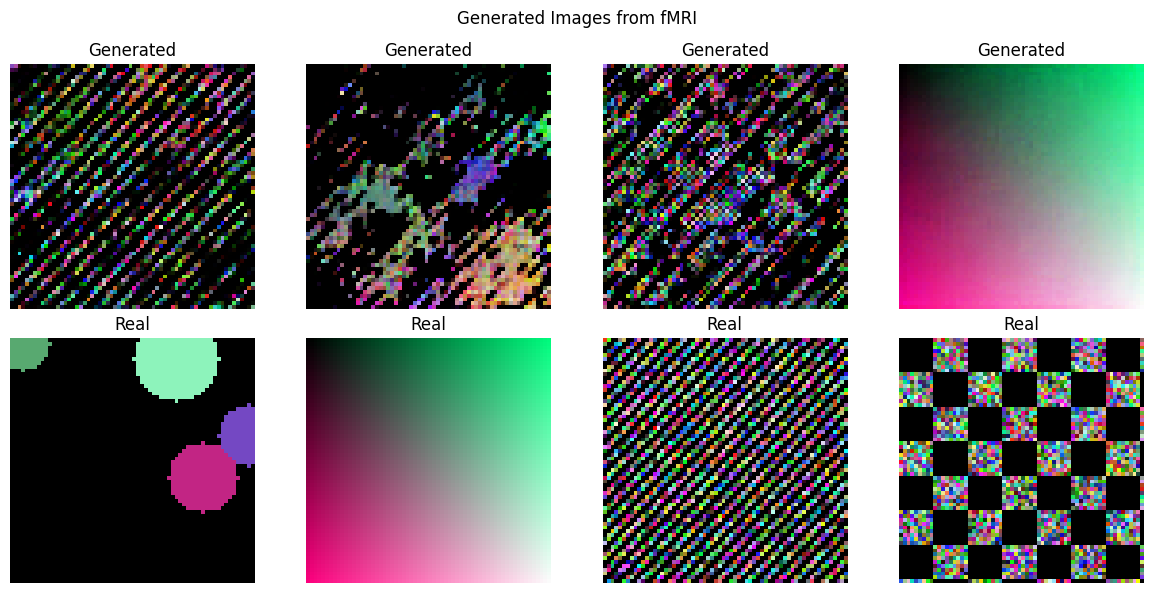

Done!


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ----------------------------
# ENHANCED FMRI ENCODER
# ----------------------------
class EnhancedFMRIEncoder(nn.Module):
    def __init__(self, input_dim=1024, hidden_dim=1024, latent_dim=512, dropout=0.1):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim, latent_dim)
        )

    def forward(self, x):
        return self.encoder(x)

# ----------------------------
# ENHANCED GENERATOR WITH ATTENTION
# ----------------------------
class AttentionBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.channels = in_channels

        self.theta = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.phi = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.g = nn.Conv2d(in_channels, in_channels // 2, kernel_size=1)
        self.o = nn.Conv2d(in_channels // 2, in_channels, kernel_size=1)

        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Query, key, value projections
        theta = self.theta(x).view(batch_size, -1, height * width).permute(0, 2, 1)
        phi = self.phi(x).view(batch_size, -1, height * width)
        g = self.g(x).view(batch_size, -1, height * width).permute(0, 2, 1)

        # Attention map
        attention = F.softmax(torch.bmm(theta, phi), dim=-1)

        # Output
        out = torch.bmm(attention, g).permute(0, 2, 1).contiguous()
        out = out.view(batch_size, channels // 2, height, width)
        out = self.o(out)

        return self.gamma * out + x

class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),

            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels)
        )

        self.skip = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 1),
            nn.BatchNorm2d(out_channels)
        ) if in_channels != out_channels else nn.Identity()

        self.activation = nn.LeakyReLU(0.2)

    def forward(self, x):
        return self.activation(self.conv_block(x) + self.skip(x))

class FMRIToImageGenerator(nn.Module):
    def __init__(self, latent_dim=512, img_channels=3, img_size=64):
        super().__init__()

        # Calculate initial feature dimensions
        self.init_size = img_size // 8
        self.latent_to_features = nn.Sequential(
            nn.Linear(latent_dim, 512 * self.init_size * self.init_size),
            nn.LeakyReLU(0.2)
        )

        # Main generation network
        self.generator = nn.Sequential(
            # First block: 8x8 -> 16x16
            nn.Upsample(scale_factor=2),
            ResBlock(512, 256),
            AttentionBlock(256),

            # Second block: 16x16 -> 32x32
            nn.Upsample(scale_factor=2),
            ResBlock(256, 128),
            AttentionBlock(128),

            # Third block: 32x32 -> 64x64
            nn.Upsample(scale_factor=2),
            ResBlock(128, 64),
            AttentionBlock(64),

            # Final output
            nn.Conv2d(64, img_channels, 3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        # Transform latent vector to initial feature map
        out = self.latent_to_features(z)
        out = out.view(out.shape[0], 512, self.init_size, self.init_size)

        # Generate image
        return self.generator(out)

# ----------------------------
# DISCRIMINATOR
# ----------------------------
class Discriminator(nn.Module):
    def __init__(self, img_channels=3, img_size=64):
        super().__init__()

        def discriminator_block(in_channels, out_channels, bn=True):
            block = [nn.Conv2d(in_channels, out_channels, 4, stride=2, padding=1)]
            if bn:
                block.append(nn.BatchNorm2d(out_channels))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *discriminator_block(img_channels, 64, bn=False),
            *discriminator_block(64, 128),
            *discriminator_block(128, 256),
            *discriminator_block(256, 512),
            nn.Conv2d(512, 1, 4, padding=0)
        )

    def forward(self, img):
        validity = self.model(img)
        return validity.view(img.shape[0], -1).mean(1)

# ----------------------------
# DATASET LOADER FOR REAL DATA
# ----------------------------
class FMRIDataset(Dataset):
    def __init__(self, fmri_data, image_data=None, transform=None):
        self.fmri_data = torch.tensor(fmri_data, dtype=torch.float32)

        if image_data is not None:
            if isinstance(image_data, np.ndarray):
                # If image_data is a numpy array (assuming format [n, h, w, c])
                self.image_data = torch.tensor(image_data, dtype=torch.float32)
                if self.image_data.shape[-1] == 3:  # Check if channels last
                    self.image_data = self.image_data.permute(0, 3, 1, 2)  # to [n, c, h, w]
            else:
                self.image_data = image_data
        else:
            self.image_data = None

        self.transform = transform

    def __len__(self):
        return len(self.fmri_data)

    def __getitem__(self, idx):
        fmri = self.fmri_data[idx]

        if self.image_data is not None:
            img = self.image_data[idx]

            if self.transform:
                # Convert tensor to PIL for transformations if needed
                if isinstance(img, torch.Tensor):
                    # Ensure image is in correct format [c, h, w] and in range [0, 1]
                    if img.shape[0] == 3:  # If already in [c, h, w]
                        img_for_transform = img
                    else:  # If in another format
                        img_for_transform = img.permute(2, 0, 1)  # Assuming [h, w, c]

                    # Scale to [0, 1] if needed
                    if img_for_transform.max() > 1.0:
                        img_for_transform = img_for_transform / 255.0

                    # Convert to PIL
                    img_pil = transforms.ToPILImage()(img_for_transform)
                    img = self.transform(img_pil)
                else:
                    img = self.transform(img)

            return fmri, img
        else:
            return fmri

# ----------------------------
# GAN TRAINING FUNCTION
# ----------------------------
def train_gan(encoder, generator, discriminator, fmri_train, img_train,
              batch_size=16, epochs=100, lr=0.0002, b1=0.5, b2=0.999,
              save_interval=10, img_size=64):

    # Create dataloaders
    transform = transforms.Compose([
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])

    dataset = FMRIDataset(fmri_train, img_train, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Loss functions
    adversarial_loss = nn.BCEWithLogitsLoss()
    pixelwise_loss = nn.L1Loss()

    # Optimizers
    optimizer_G = torch.optim.Adam(
        list(encoder.parameters()) + list(generator.parameters()),
        lr=lr, betas=(b1, b2)
    )
    optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

    # Training loop
    d_loss = torch.tensor(0.0)  # Initialize with default value

    for epoch in range(epochs):
        for i, (fmri, real_imgs) in enumerate(dataloader):
            batch_size = real_imgs.shape[0]

            # Configure input
            real_imgs = real_imgs.to(device)
            fmri = fmri.to(device)

            # Set ground truth label values
            valid = torch.ones(batch_size, requires_grad=False, device=device)
            fake = torch.zeros(batch_size, requires_grad=False, device=device)

            # ------------------
            #  Train Generator
            # ------------------
            optimizer_G.zero_grad()

            # Generate a batch of images
            z = encoder(fmri)
            gen_imgs = generator(z)

            # GAN loss
            g_loss_adv = adversarial_loss(discriminator(gen_imgs), valid)

            # Pixel-wise loss
            g_loss_pixel = pixelwise_loss(gen_imgs, real_imgs)

            # Total generator loss
            g_loss = 0.01 * g_loss_adv + 0.99 * g_loss_pixel

            g_loss.backward()
            optimizer_G.step()

            # ------------------
            #  Train Discriminator
            # ------------------
            if i % 5 == 0:  # Train discriminator less frequently
                optimizer_D.zero_grad()

                # Real batch
                d_real = discriminator(real_imgs)
                d_loss_real = adversarial_loss(d_real, valid)

                # Fake batch
                d_fake = discriminator(gen_imgs.detach())  # Detach to avoid training generator
                d_loss_fake = adversarial_loss(d_fake, fake)

                # Total discriminator loss
                d_loss = (d_loss_real + d_loss_fake) / 2

                d_loss.backward()
                optimizer_D.step()

            # Print progress
            if i % 10 == 0:
                print(
                    f"[Epoch {epoch}/{epochs}] [Batch {i}/{len(dataloader)}] "
                    f"[D loss: {d_loss.item():.4f}] [G adv: {g_loss_adv.item():.4f}, pixel: {g_loss_pixel.item():.4f}]"
                )

        # Save model and sample images
        if epoch % save_interval == 0 or epoch == epochs - 1:
            torch.save({
                'encoder': encoder.state_dict(),
                'generator': generator.state_dict(),
                'discriminator': discriminator.state_dict(),
                'optimizer_G': optimizer_G.state_dict(),
                'optimizer_D': optimizer_D.state_dict(),
            }, f"brain_decoder_checkpoint_epoch{epoch}.pth")

            # Generate and save sample images
            with torch.no_grad():
                # Get a small batch for visualization
                fmri_sample = fmri[:min(4, batch_size)].to(device)  # Only take up to 4 samples
                z = encoder(fmri_sample)
                gen_imgs = generator(z)
                # Denormalize and save
                gen_imgs = (gen_imgs + 1) / 2.0  # [-1, 1] -> [0, 1]

                # Create a grid for visualization
                num_samples = gen_imgs.size(0)
                fig, axs = plt.subplots(1, num_samples, figsize=(num_samples*3, 3))

                # Handle case where only one image is generated
                if num_samples == 1:
                    axs.imshow(gen_imgs[0].cpu().permute(1, 2, 0).numpy())
                    axs.axis('off')
                else:
                    for j in range(num_samples):
                        axs[j].imshow(gen_imgs[j].cpu().permute(1, 2, 0).numpy())
                        axs[j].axis('off')

                plt.tight_layout()
                plt.savefig(f"generated_samples_epoch{epoch}.png")
                plt.close()

    return encoder, generator, discriminator

# ----------------------------
# MAIN FUNCTION TO LOAD REAL DATA AND TRAIN
# ----------------------------
def main(fmri_path=None, images_path=None, synthetic=True):
    # Model parameters
    latent_dim = 512
    img_channels = 3
    img_size = 64
    batch_size = 32
    epochs = 150  # Reduced for faster training
    lr = 0.0002

    # Initialize models
    encoder = EnhancedFMRIEncoder(input_dim=1024, hidden_dim=1024, latent_dim=latent_dim).to(device)
    generator = FMRIToImageGenerator(latent_dim=latent_dim, img_channels=img_channels, img_size=img_size).to(device)
    discriminator = Discriminator(img_channels=img_channels, img_size=img_size).to(device)

    # Either load real data or create synthetic data
    if not synthetic and fmri_path and images_path:
        print("Loading real data...")
        # Load real fMRI and image data
        fmri_data = np.load(fmri_path)
        image_data = np.load(images_path)

        # Split into train/test
        split = int(0.9 * len(fmri_data))
        fmri_train, fmri_test = fmri_data[:split], fmri_data[split:]
        img_train, img_test = image_data[:split], image_data[split:]
    else:
        print("Creating synthetic data...")
        # Create synthetic data
        num_samples = 1000
        fmri_dim = 1024

        # Generate fMRI vectors
        fmri_data = np.random.randn(num_samples, fmri_dim).astype(np.float32)

        # Generate simple pattern images (better than pure noise)
        image_data = np.zeros((num_samples, img_size, img_size, img_channels), dtype=np.float32)

        for i in range(num_samples):
            # Create structured patterns based on fMRI
            seed = np.abs(fmri_data[i].sum()) % 10000
            np.random.seed(int(seed))

            # Create random circles or gradients
            img = np.zeros((img_size, img_size, img_channels))

            pattern_type = i % 4
            if pattern_type == 0:  # Circles
                num_circles = np.random.randint(1, 5)
                for _ in range(num_circles):
                    cx, cy = np.random.randint(0, img_size, 2)
                    radius = np.random.randint(5, img_size//3)
                    color = np.random.random(3)

                    y, x = np.ogrid[-cy:img_size-cy, -cx:img_size-cx]
                    mask = x*x + y*y <= radius*radius

                    for c in range(3):
                        img[mask, c] = color[c]

            elif pattern_type == 1:  # Gradient
                for y in range(img_size):
                    for x in range(img_size):
                        img[y, x, 0] = y / img_size
                        img[y, x, 1] = x / img_size
                        img[y, x, 2] = (x + y) / (2 * img_size)

            elif pattern_type == 2:  # Stripes
                stripe_width = np.random.randint(2, 10)
                for y in range(img_size):
                    for x in range(img_size):
                        if (x + y) % stripe_width < stripe_width // 2:
                            img[y, x] = np.random.random(3)

            else:  # Checker pattern
                square_size = np.random.randint(4, 16)
                for y in range(img_size):
                    for x in range(img_size):
                        if ((x // square_size) + (y // square_size)) % 2:
                            img[y, x] = np.random.random(3)

            image_data[i] = img

        # Split into train/test
        split = int(0.9 * num_samples)
        fmri_train, fmri_test = fmri_data[:split], fmri_data[split:]
        img_train, img_test = image_data[:split], image_data[split:]

    print(f"Training set: {len(fmri_train)} samples")
    print(f"Testing set: {len(fmri_test)} samples")

    # Train the model
    print("Starting training...")
    encoder, generator, discriminator = train_gan(
        encoder, generator, discriminator,
        fmri_train, img_train,
        batch_size=batch_size,
        epochs=epochs,
        lr=lr,
        save_interval=10,
        img_size=img_size
    )

    # Save final model
    torch.save({
        'encoder': encoder.state_dict(),
        'generator': generator.state_dict(),
        'discriminator': discriminator.state_dict(),
    }, "brain_decoder_final.pth")

    # Generate test samples
    print("Generating test samples...")
    test_dataset = FMRIDataset(fmri_test, img_test)
    test_loader = DataLoader(test_dataset, batch_size=4)  # Use smaller batch size

    fmri_batch, real_imgs = next(iter(test_loader))

    with torch.no_grad():
        z = encoder(fmri_batch.to(device))
        gen_imgs = generator(z)
        # Denormalize
        gen_imgs = (gen_imgs + 1) / 2.0  # [-1, 1] -> [0, 1]

        # Display results
        plt.figure(figsize=(12, 6))
        plt.suptitle("Generated Images from fMRI")

        num_samples = gen_imgs.size(0)
        for i in range(num_samples):
            # Display generated image
            plt.subplot(2, num_samples, i+1)
            plt.imshow(gen_imgs[i].cpu().permute(1, 2, 0).numpy())
            plt.axis('off')
            plt.title("Generated")

            # Display real image if available
            if real_imgs is not None:
                plt.subplot(2, num_samples, i+num_samples+1)

                if isinstance(real_imgs, torch.Tensor):
                    if real_imgs.shape[1] == 3:  # If [N, C, H, W]
                        real_img = real_imgs[i].cpu()
                    else:  # If [N, H, W, C]
                        real_img = real_imgs[i].permute(2, 0, 1).cpu()

                    # Normalize if needed
                    if real_img.max() > 1.0:
                        real_img = real_img / 255.0

                    plt.imshow(real_img.permute(1, 2, 0).numpy())
                else:
                    plt.imshow(real_imgs[i])

                plt.axis('off')
                plt.title("Real")

        plt.tight_layout()
        plt.savefig("brain_decoder_test_results.png")
        plt.show()

    print("Done!")

if __name__ == "__main__":
    main(synthetic=True)  # Change to False and provide paths for real data

In [ ]:
!pip uninstall -y jax jaxlib flax diffusers transformers huggingface_hub accelerate


Found existing installation: diffusers 0.15.1
Uninstalling diffusers-0.15.1:
  Successfully uninstalled diffusers-0.15.1
Found existing installation: transformers 4.29.2
Uninstalling transformers-4.29.2:
  Successfully uninstalled transformers-4.29.2
Found existing installation: huggingface-hub 0.14.1
Uninstalling huggingface-hub-0.14.1:
  Successfully uninstalled huggingface-hub-0.14.1
Found existing installation: accelerate 0.18.0
Uninstalling accelerate-0.18.0:
  Successfully uninstalled accelerate-0.18.0


In [ ]:
!pip show jax flax


In [ ]:
!pip install diffusers==0.15.1 \
             transformers==4.29.2 \
             huggingface_hub==0.14.1 \
             accelerate==0.18.0 \
             torch torchvision matplotlib


  Using cached diffusers-0.15.1-py3-none-any.whl.metadata (19 kB)
  Using cached transformers-4.29.2-py3-none-any.whl.metadata (112 kB)
  Using cached huggingface_hub-0.14.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached accelerate-0.18.0-py3-none-any.whl.metadata (16 kB)
Using cached diffusers-0.15.1-py3-none-any.whl (851 kB)
Using cached transformers-4.29.2-py3-none-any.whl (7.1 MB)
Using cached huggingface_hub-0.14.1-py3-none-any.whl (224 kB)
Using cached accelerate-0.18.0-py3-none-any.whl (215 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires huggingface-hub>=0.20.0, but you have huggingface-hub 0.14.1 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.29.2 which is incompatible.
peft 0.14.0 requires accelerate>=0.21.0, but you have accelerate 0.18.0 

PHASE 3: Latent Diffusion Model (LDM)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

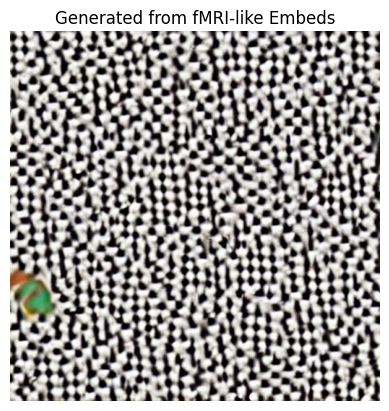

In [1]:
from diffusers import StableDiffusionPipeline, DDIMScheduler
from huggingface_hub import login
import torch
import matplotlib.pyplot as plt

# STEP 1: Login to Hugging Face
login()

# STEP 2: Load pipeline on CPU
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4"
).to("cpu")

# STEP 3: Replace scheduler (optional)
pipe.scheduler = DDIMScheduler.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="scheduler"
)

# STEP 4: Fix dummy prompt_embeds to be 3D: (batch, seq_len, dim)
# Original SD uses dim=768 and seq_len=77 (but anything reasonable works for dummy)
batch_size = 1
seq_len = 77
embed_dim = 768
latent_fmri = torch.randn(batch_size, seq_len, embed_dim).to("cpu")  # Fake prompt_embeds

# STEP 5:  latents: (batch, 4, 64, 64)
latents = torch.randn(1, 4, 64, 64).to("cpu")

# STEP 6: Generate image
with torch.no_grad():
    result = pipe(prompt_embeds=latent_fmri, latents=latents,
                  guidance_scale=7.5, num_inference_steps=50)
    image = result.images[0]

# STEP 7: Show result
plt.imshow(image)
plt.axis("off")
plt.title("Generated from fMRI-like Embeds")
plt.show()
